#  Hệ thống dự báo thông minh cho Startup: Trạng thái hoạt động & mức tài trợ Smart Forecasting System for Startups: Operational Status & Investment Levels

## 1. Định nghĩa bài toán

### 1.1. Mục tiêu

Đề tài tập trung khai thác và phân tích dữ liệu từ các công ty khởi nghiệp nhằm xây dựng hai mô hình học máy phục vụ cho hai mục tiêu chính.



1. Mục tiêu thứ nhất là phân loại trạng thái hoạt động của công ty (đang hoạt động, đã bị mua lại, ngừng hoạt động, v.v.) dựa trên các thông tin như thị trường hoạt động, quốc gia, số vòng gọi vốn và năm thành lập.
2. Mục tiêu thứ hai là dự đoán tổng số vốn đầu tư (funding_total_usd) mà một công ty có thể huy động, thông qua mô hình hồi quy. Dữ liệu sẽ được tiền xử lý, mã hóa và chuẩn hóa trước khi huấn luyện bằng các thuật toán học máy phổ biến như Logistic Regression, Random Forest, XGBoost, KNN và SVM.


Kết quả sẽ được đánh giá qua các chỉ số như Accuracy, F1 Score (cho phân loại) và RMSE, R² (cho hồi quy), từ đó hỗ trợ các nhà đầu tư và chuyên gia đưa ra quyết định hiệu quả hơn.

### 1.2. Bối cảnh thực tế

Trong thời đại dữ liệu lớn, các công ty khởi nghiệp (startups) cung cấp nguồn dữ liệu phong phú, tạo điều kiện thuận lợi cho việc ứng dụng học máy nhằm hỗ trợ ra quyết định đầu tư. Việc dự đoán trạng thái hoạt động của startup (như còn hoạt động, bị mua lại, ngừng hoạt động) và ước lượng vốn đầu tư có thể huy động trở thành những bài toán quan trọng, được nhiều nhà nghiên cứu và tổ chức tài chính quan tâm.

Các nền tảng như Crunchbase đã cung cấp dữ liệu đầu vào cho nhiều nghiên cứu, nơi các mô hình học máy hiện đại như Logistic Regression, Random Forest, XGBoost và hồi quy tuyến tính được triển khai để phân tích ảnh hưởng của các yếu tố như thị trường, quốc gia, loại hình đầu tư và thời gian thành lập.

Tuy nhiên, bài toán vẫn đối mặt với nhiều thách thức như dữ liệu không cân bằng, thông tin thiếu hoặc nhiễu, và sự thay đổi nhanh chóng trong hệ sinh thái khởi nghiệp. Vì vậy, cần có các phương pháp tiếp cận toàn diện và linh hoạt để đảm bảo độ tin cậy và tính ứng dụng cao trong thực tế.

### 1.3. Giải pháp



*   Với bài toán phân loại, đề tài kỳ vọng xây dựng được mô hình có khả năng dự đoán chính xác trạng thái hoạt động của công ty (ví dụ: operating, acquired, closed), với độ chính xác tổng thể (Accuracy) vượt mức 80% và F1 Score trên 0.75, ngay cả trong điều kiện mất cân bằng lớp. Các mô hình như Random Forest và XGBoost được kỳ vọng sẽ chiếm ưu thế nhờ khả năng xử lý dữ liệu phi tuyến và tính linh hoạt cao. Đồng thời, thông qua phân tích feature importance, đề tài sẽ xác định được các yếu tố có ảnh hưởng lớn nhất đến trạng thái sống còn của doanh nghiệp, chẳng hạn như thị trường mục tiêu, quốc gia, giai đoạn gọi vốn, hoặc số vòng gọi vốn.


*   Đối với bài toán hồi quy, kết quả mong đợi là mô hình có sai số dự đoán thấp (MAE và RMSE ở mức tối thiểu), cùng hệ số xác định R² đạt trên 0.75, phản ánh khả năng giải thích hợp lý biến động của tổng vốn đầu tư. Mô hình Random Forest Regressor hoặc XGBoost Regressor được dự đoán sẽ cho kết quả tốt hơn so với các mô hình tuyến tính nhờ khả năng nắm bắt các mối quan hệ phi tuyến và tương tác giữa các biến đầu vào.


*   Đề tài hướng đến xây dựng một khuôn mẫu có khả năng tích hợp vào hệ thống đánh giá rủi ro cho các quỹ đầu tư, vườn ươm doanh nghiệp và các nền tảng hỗ trợ startup. Ngoài việc tạo ra giá trị dự báo, mô hình còn cung cấp insight – các hiểu biết chiến lược giúp định hướng cho các doanh nghiệp non trẻ trong việc lựa chọn thị trường, cơ cấu gọi vốn và chiến lược phát triển. Đây là bước tiến từ việc “dự đoán kết quả” sang “hỗ trợ định hình quyết định”, một mục tiêu cốt lõi trong khoa học dữ liệu hiện đại.

## 2. Import các thư viện cần thiết cho mô hình

In [ ]:
# Thư viện hỗ trợ
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from google.colab import drive

In [ ]:
# Các mô hình cho BÀI TOÁN PHÂN LOẠI
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [ ]:
# Các mô hình cho BÀI TOÁN HỒI QUY
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [ ]:
# Tiện ích chung cho cả 2 loại bài toán
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV,learning_curve, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, roc_auc_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline

## 3.Thu thập và khám phá dữ liệu

In [ ]:
# Đọc dữ liệu
drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/investments_VC.csv'
df = pd.read_csv(file_path,  encoding='ISO-8859-1')
print(f"Dữ liệu đã được tải với {df.shape[0]} dòng và {df.shape[1]} cột.")


Mounted at /content/drive
Dữ liệu đã được tải với 54294 dòng và 39 cột.


In [ ]:
df = df.rename(columns={'market ': 'market', 'funding_total_usd ': 'funding_total_usd'})
#Based on the .info() function, we can identify that some data variables need to be converted into a date type.
format_date = ('founded_at','first_funding_at','last_funding_at')
for i in format_date:
  df[i] = pd.to_datetime(df[i], format = '%Y-%m-%d', errors = 'coerce')

In [ ]:
df.columns = df.columns.str.strip()


In [ ]:
df.head()

,permalink,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,...,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
0,/organization/waywire,#waywire,http://www.waywire.com,|Entertainment|Politics|Social Media|News|,News,"17,50,000",acquired,USA,NY,New York City,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,/organization/tv-communications,&TV Communications,http://enjoyandtv.com,|Games|,Games,"40,00,000",operating,USA,CA,Los Angeles,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,/organization/rock-your-paper,'Rock' Your Paper,http://www.rockyourpaper.org,|Publishing|Education|,Publishing,"40,000",operating,EST,NaN,Tallinn,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,/organization/in-touch-network,(In)Touch Network,http://www.InTouchNetwork.com,|Electronics|Guides|Coffee|Restaurants|Music|i...,Electronics,"15,00,000",operating,GBR,NaN,London,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,/organization/r-ranch-and-mine,-R- Ranch and Mine,NaN,|Tourism|Entertainment|Games|,Tourism,"60,000",operating,USA,TX,Dallas,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Thông tin cơ bản
print("===== THÔNG TIN CƠ BẢN =====")
print(df.info())
# Đếm tổng số giá trị null trong toàn bộ DataFrame
total_null = df.isnull().sum().sum()
print(f"Tổng số giá trị null trong dữ liệu: {total_null}")

# Đếm số giá trị null theo từng cột
null_per_column = df.isnull().sum()
print("\nSố giá trị null theo từng cột:")
print(null_per_column)

===== THÔNG TIN CƠ BẢN =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54294 entries, 0 to 54293
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   permalink             49438 non-null  object        
 1   name                  49437 non-null  object        
 2   homepage_url          45989 non-null  object        
 3   category_list         45477 non-null  object        
 4   market                45470 non-null  object        
 5   funding_total_usd     49438 non-null  object        
 6   status                48124 non-null  object        
 7   country_code          44165 non-null  object        
 8   state_code            30161 non-null  object        
 9   region                44165 non-null  object        
 10  city                  43322 non-null  object        
 11  funding_rounds        49438 non-null  float64       
 12  founded_at            38553 non-null  datetim

Bộ dữ liệu Investments từ nền tảng Kaggle chứa thông tin chi tiết về 54,294 công ty khởi nghiệp (startups) trên toàn cầu với 39 cột đặc trưng, bao gồm dữ liệu về ngành nghề, vị trí địa lý, thời điểm thành lập, loại hình và quy mô đầu tư, cùng với biến mục tiêu là trạng thái hoạt động (status). Cụ thể:

* Thông tin chung về doanh nghiệp:

  + Tên công ty (name)

  + Website (homepage_url)

  + Ngành nghề kinh doanh (category_list)

  + Thị trường mục tiêu (market)

- Vị trí địa lý: quốc gia (country_code), bang (state_code), khu vực (region), thành phố (city)

- Thời gian hoạt động và đầu tư:
Năm thành lập (founded_year), tháng/quý (founded_month, founded_quarter)

- Ngày gọi vốn đầu tiên và cuối cùng (first_funding_at, last_funding_at)

- Số vòng gọi vốn (funding_rounds)

- Tổng vốn đầu tư (funding_total_usd)

- Loại hình và giai đoạn gọi vốn:
Các cột chỉ báo cho từng hình thức đầu tư:
seed, venture, angel, grant, debt_financing, private_equity,...

* Các cột chỉ báo cho từng vòng gọi vốn cụ thể:
round_A, round_B, ..., round_H

- Biến mục tiêu:
status: Tình trạng hiện tại của công ty, gồm các giá trị như operating, acquired, closed, ipo, v.v.

- Ghi chú về dữ liệu:
Dữ liệu có chứa 281,785 giá trị thiếu trên nhiều cột, đáng chú ý nhất là:
founded_year (15,812), status (6,170), country_code (10,129), city (10,972)

- Cột funding_total_usd hiện đang ở dạng object và cần được chuyển đổi sang số.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
print("===== THỐNG KÊ MÔ TẢ CHO BIẾN SỐ =====")
df.describe()

===== THỐNG KÊ MÔ TẢ CHO BIẾN SỐ =====


,funding_rounds,founded_at,founded_year,first_funding_at,last_funding_at,seed,venture,equity_crowdfunding,undisclosed,convertible_note,...,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
count,49438.000000,38553,38482.000000,49428,49432,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,...,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04
mean,1.696205,2007-04-24 13:20:39.592249600,2007.359129,2011-03-13 00:56:29.366351104,2012-01-19 13:03:07.603172096,2.173215e+05,7.501051e+06,6.163322e+03,1.302213e+05,2.336410e+04,...,3.845592e+04,7.074227e+03,1.243955e+06,1.492891e+06,1.205356e+06,7.375261e+05,3.424682e+05,1.697692e+05,5.767067e+04,1.423197e+04
min,1.000000,1785-01-01 00:00:00,1902.000000,1921-09-01 00:00:00,1921-09-01 00:00:00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.000000,2005-11-29 00:00:00,2006.000000,2009-08-23 18:00:00,2010-10-14 00:00:00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.000000,2010-01-01 00:00:00,2010.000000,2011-12-12 00:00:00,2012-12-07 00:00:00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,2.000000,2012-01-01 00:00:00,2012.000000,2013-08-01 00:00:00,2014-02-01 00:00:00,2.500000e+04,5.000000e+06,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,18.000000,2014-12-13 00:00:00,2014.000000,2014-12-31 00:00:00,2015-01-01 00:00:00,1.300000e+08,2.351000e+09,2.500000e+07,2.924328e+08,3.000000e+08,...,6.806116e+08,7.200000e+07,3.190000e+08,5.420000e+08,4.900000e+08,1.200000e+09,4.000000e+08,1.060000e+09,1.000000e+09,6.000000e+08
std,1.294213,NaN,7.579203,NaN,NaN,1.056985e+06,2.847112e+07,1.999048e+05,2.981404e+06,1.432046e+06,...,3.864461e+06,4.282166e+05,5.531974e+06,7.472704e+06,7.993592e+06,9.815218e+06,5.406915e+06,6.277905e+06,5.252312e+06,2.716865e+06


## 4. Tiền xử lý dữ liệu


In [ ]:
# Tính số năm kể từ khi thành lập đến lần gọi vốn đầu tiên và lần gọi vốn cuối cùng
df['age_first_funding'] = (df['first_funding_at'] - df['founded_at']) / pd.Timedelta(days=365)
df['age_last_funding'] = (df['last_funding_at'] - df['founded_at']) / pd.Timedelta(days=365)

# Trích xuất tháng và quý thành lập từ ngày thành lập
df['founded_month'] = pd.to_datetime(df['founded_at']).dt.month
df['founded_quarter'] = pd.to_datetime(df['founded_at']).dt.quarter

# Tuỳ chọn: Xoá cột 'founded_at' nếu không còn cần thiết
# df.drop('founded_at', axis=1, inplace=True)
# Xóa dấu phẩy, chuyển sang float
df['funding_total_usd'] = df['funding_total_usd'].replace('[\$,]', '', regex=True)  # nếu có $
df['funding_total_usd'] = df['funding_total_usd'].replace(',', '', regex=True)
df['funding_total_usd'] = pd.to_numeric(df['funding_total_usd'], errors='coerce')  # ép sang số

# Xoá các dòng NaN sau khi chuyển đổi không thành công
df = df.dropna(subset=['funding_total_usd'])



In [ ]:
df.isnull().sum()

,0
permalink,0
name,1
homepage_url,2314
category_list,2503
market,2508
funding_total_usd,0
status,1105
country_code,3819
state_code,15288
region,3819


In [ ]:
# Vì bộ dữ liệu chứa khá nhiều giá trị null, chúng ta cố gắng giảm bớt số lượng giá trị null
# bằng cách xóa các dòng chứa giá trị null trong một số biến quan trọng
df = df.drop(df[
                                        (
                                        (df['status'].isna())|  # Trạng thái
                                        (df['founded_month'].isna())|  # Tháng thành lập
                                        (df['founded_year'].isna())|  # Năm thành lập
                                        (df['market'].isna())|  # Thị trường
                                        (df['country_code'].isna())|  # Mã quốc gia
                                        (df['funding_total_usd'].isna())|  # Tổng số tiền gọi vốn (USD)
                                        (df['age_first_funding'].isna())  # Tuổi khi gọi vốn lần đầu
                                        )
                                        ].index)

# Sau khi xóa tất cả các dòng chứa giá trị null, chúng ta còn lại 28290 quan sát
df.shape


(28290, 41)

In [ ]:
# Kiểm tra số lượng giá trị thiếu trong từng cột
df.isnull().sum()


,0
permalink,0
name,0
homepage_url,1049
category_list,0
market,0
funding_total_usd,0
status,0
country_code,0
state_code,8320
region,0


In [ ]:
# Loại bỏ các biến không liên quan đến việc dự đoán thành công của start-up
# funding_total_usd bị loại vì là tổng hợp từ nhiều nguồn vốn khác (angel, seed,...)
# Giữ lại cột 'name' để phân biệt các công ty trong phân tích sau

columns_to_drop = [
    'permalink', 'homepage_url', 'state_code', 'region', 'city',
    'founded_at', 'first_funding_at', 'last_funding_at',
    'funding_total_usd', 'category_list','founded_month','founded_quarter'
]

# Chuẩn hóa tên cột: loại bỏ khoảng trắng đầu/cuối
df.columns = df.columns.str.strip()

# Giữ lại những cột thực sự có trong DataFrame
valid_columns_to_drop = [col for col in columns_to_drop if col in df.columns]

# Xoá các cột có tồn tại
df_clean = df.drop(valid_columns_to_drop, axis=1)




In [ ]:
# Kiểm tra và loại bỏ các dòng trùng lặp (nếu có) trong DataFrame
df_clean = df.drop_duplicates()

# Hiển thị kích thước của DataFrame sau khi loại bỏ dòng trùng lặp
df_clean.shape


(28290, 41)

In [ ]:
print('Trước: ')
display(df_clean.groupby('status').agg({'country_code':'count'}).sort_values(by=['status'], ascending = False))
StatusDict = {"closed":0,"acquired":1}

df_clean = df_clean[(df_clean['status'] == 'acquired') | (df_clean['status'] == 'closed')]
df_clean["status_binary"] = df_clean["status"].map(StatusDict)


print('Sau: ')
display(df_clean.groupby('status_binary').agg({'country_code':'count'}).sort_values(by=['status_binary'], ascending = True))

Trước: 


,country_code
status,
operating,24332
closed,1462
acquired,2496


Sau: 


<ipython-input-20-bb7815d64ebc>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["status_binary"] = df_clean["status"].map(StatusDict)


,country_code
status_binary,
0,1462
1,2496


In [ ]:
# Tạo cột mới tổng hợp toàn bộ các khoản đầu tư từ nhiều loại hình khác nhau
df_clean['total_investment'] = (
    df_clean['seed'] +
    df_clean['venture'] +
    df_clean['equity_crowdfunding'] +
    df_clean['undisclosed'] +
    df_clean['convertible_note'] +
    df_clean['debt_financing'] +
    df_clean['angel'] +
    df_clean['grant'] +
    df_clean['private_equity'] +
    df_clean['post_ipo_equity'] +
    df_clean['post_ipo_debt'] +
    df_clean['secondary_market'] +
    df_clean['product_crowdfunding']
)

# Xem thống kê mô tả của cột tổng đầu tư
df_clean['total_investment'].describe()


,total_investment
count,3.958000e+03
mean,1.872350e+07
std,1.047493e+08
min,1.000000e+03
25%,9.350000e+05
50%,5.000000e+06
75%,1.700000e+07
max,5.700000e+09


In [ ]:
max(df_clean['total_investment'])

5700000000.0

In [ ]:
# Lọc ra các cột số
numeric_cols = df_clean.select_dtypes(include=['float64', 'int64']).columns



In [ ]:
# Tính các phần tư Q1 và Q3
Q1 = df_clean['total_investment'].quantile(0.01)
Q3 = df_clean['total_investment'].quantile(0.99)

# Tính IQR
IQR = Q3 - Q1

# Xác định ngưỡng dưới và trên để loại bỏ outliers
fund_lower = Q1 - 1.5 * IQR
fund_upper = Q3 + 1.5 * IQR

# Giữ lại những giá trị nằm trong khoảng cho phép
df_clean = df_clean[
    (df_clean['total_investment'] >= fund_lower) &
    (df_clean['total_investment'] <= fund_upper)
]

# In kết quả
print('Đã loại bỏ các điểm dữ liệu nhỏ hơn {} và lớn hơn {}'.format(fund_lower, fund_upper))
print('Kích thước dữ liệu sau khi loại bỏ outliers:', df_clean.shape)


Đã loại bỏ các điểm dữ liệu nhỏ hơn -256951781.26999962 và lớn hơn 428279635.44999933
Kích thước dữ liệu sau khi loại bỏ outliers: (3947, 43)


In [ ]:
# Tạo bản sao dữ liệu đã loại outliers
df_no_outliers = df_clean.copy()

for col in numeric_cols:
    Q1 = df_no_outliers[col].quantile(0.05)
    Q3 = df_no_outliers[col].quantile(0.95)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Giữ lại các giá trị nằm trong khoảng cho phép
    df_no_outliers = df_no_outliers[
        (df_no_outliers[col] >= lower_bound) & (df_no_outliers[col] <= upper_bound)
    ]



In [ ]:
# Lấy danh sách 20 thị trường (market) xuất hiện nhiều nhất
top20_markets = df_clean['market'].value_counts()[:20].keys().tolist()

# Với các market không thuộc top 20 → gán thành 'Other'
df_clean['market'] = df_clean['market'].apply(lambda i: i if i in top20_markets else 'Other')


In [ ]:
# Cắt giá trị âm → 0, giữ nguyên các giá trị còn lại
df_clean['age_first_funding'] = df_clean['age_first_funding'].clip(lower=0)
df_clean['age_last_funding'] = df_clean['age_last_funding'].clip(lower=0)


In [ ]:
# Giữ lại các startup được thành lập từ năm 1995 trở đi
df_clean = df_clean[(df_clean['founded_year'] >= 1995.0 )]


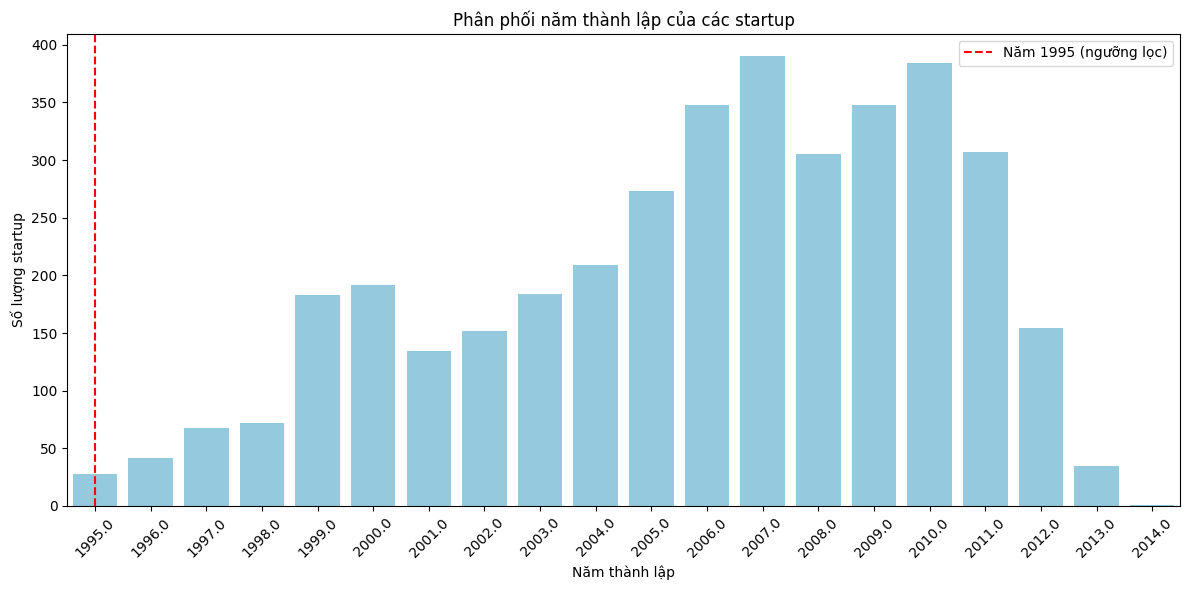

In [ ]:

# Đếm số lượng startup theo từng năm
count_by_year = df_clean['founded_year'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
sns.barplot(x=count_by_year.index, y=count_by_year.values, color='skyblue')

# Đường đánh dấu năm 1995 (vì giờ là trục x dạng discrete nên cần xử lý khác một chút)
plt.axvline(x=list(count_by_year.index).index(1995), color='red', linestyle='--', label='Năm 1995 (ngưỡng lọc)')

plt.title('Phân phối năm thành lập của các startup')
plt.xlabel('Năm thành lập')
plt.ylabel('Số lượng startup')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

**Giai đoạn 1995-2000:**
 Số lượng startup thành lập trong giai đoạn này rất thấp, dao động từ 0 đến khoảng 50 startup mỗi năm. Điều này cho thấy hệ sinh thái khởi nghiệp thời điểm này có thể chưa phát triển mạnh, hoặc dữ liệu trong bộ dữ liệu này không đầy đủ cho các năm trước 2000.

**Giai đoạn 2001-2005:** Số lượng startup bắt đầu tăng nhẹ, dao động từ khoảng 100 đến 200 startup mỗi năm. Đây có thể là giai đoạn khởi đầu của sự phát triển trong hệ sinh thái khởi nghiệp, có thể liên quan đến sự bùng nổ của các công nghệ internet hoặc các chính sách hỗ trợ khởi nghiệp.

**Giai đoạn 2006-2011:** Đây là giai đoạn cao điểm, với số lượng startup thành lập tăng mạnh, dao động từ 300 đến gần 400 startup mỗi năm. Đỉnh cao được ghi nhận vào khoảng năm 2008-2010, khi số lượng startup đạt gần 400. Điều này có thể phản ánh sự phát triển mạnh mẽ của hệ sinh thái khởi nghiệp toàn cầu, đặc biệt trong các lĩnh vực công nghệ, cùng với sự gia tăng của các quỹ đầu tư mạo hiểm.

**Giai đoạn 2012-2014:** Số lượng startup thành lập giảm dần, từ khoảng 300 xuống còn dưới 100 vào năm 2014. Sự sụt giảm này có thể do nhiều yếu tố, như dữ liệu không đầy đủ cho các năm gần đây (bộ dữ liệu có thể được thu thập trước khi dữ liệu 2014 hoàn thiện), hoặc do thị trường khởi nghiệp bắt đầu bão hòa ở một số khu vực.

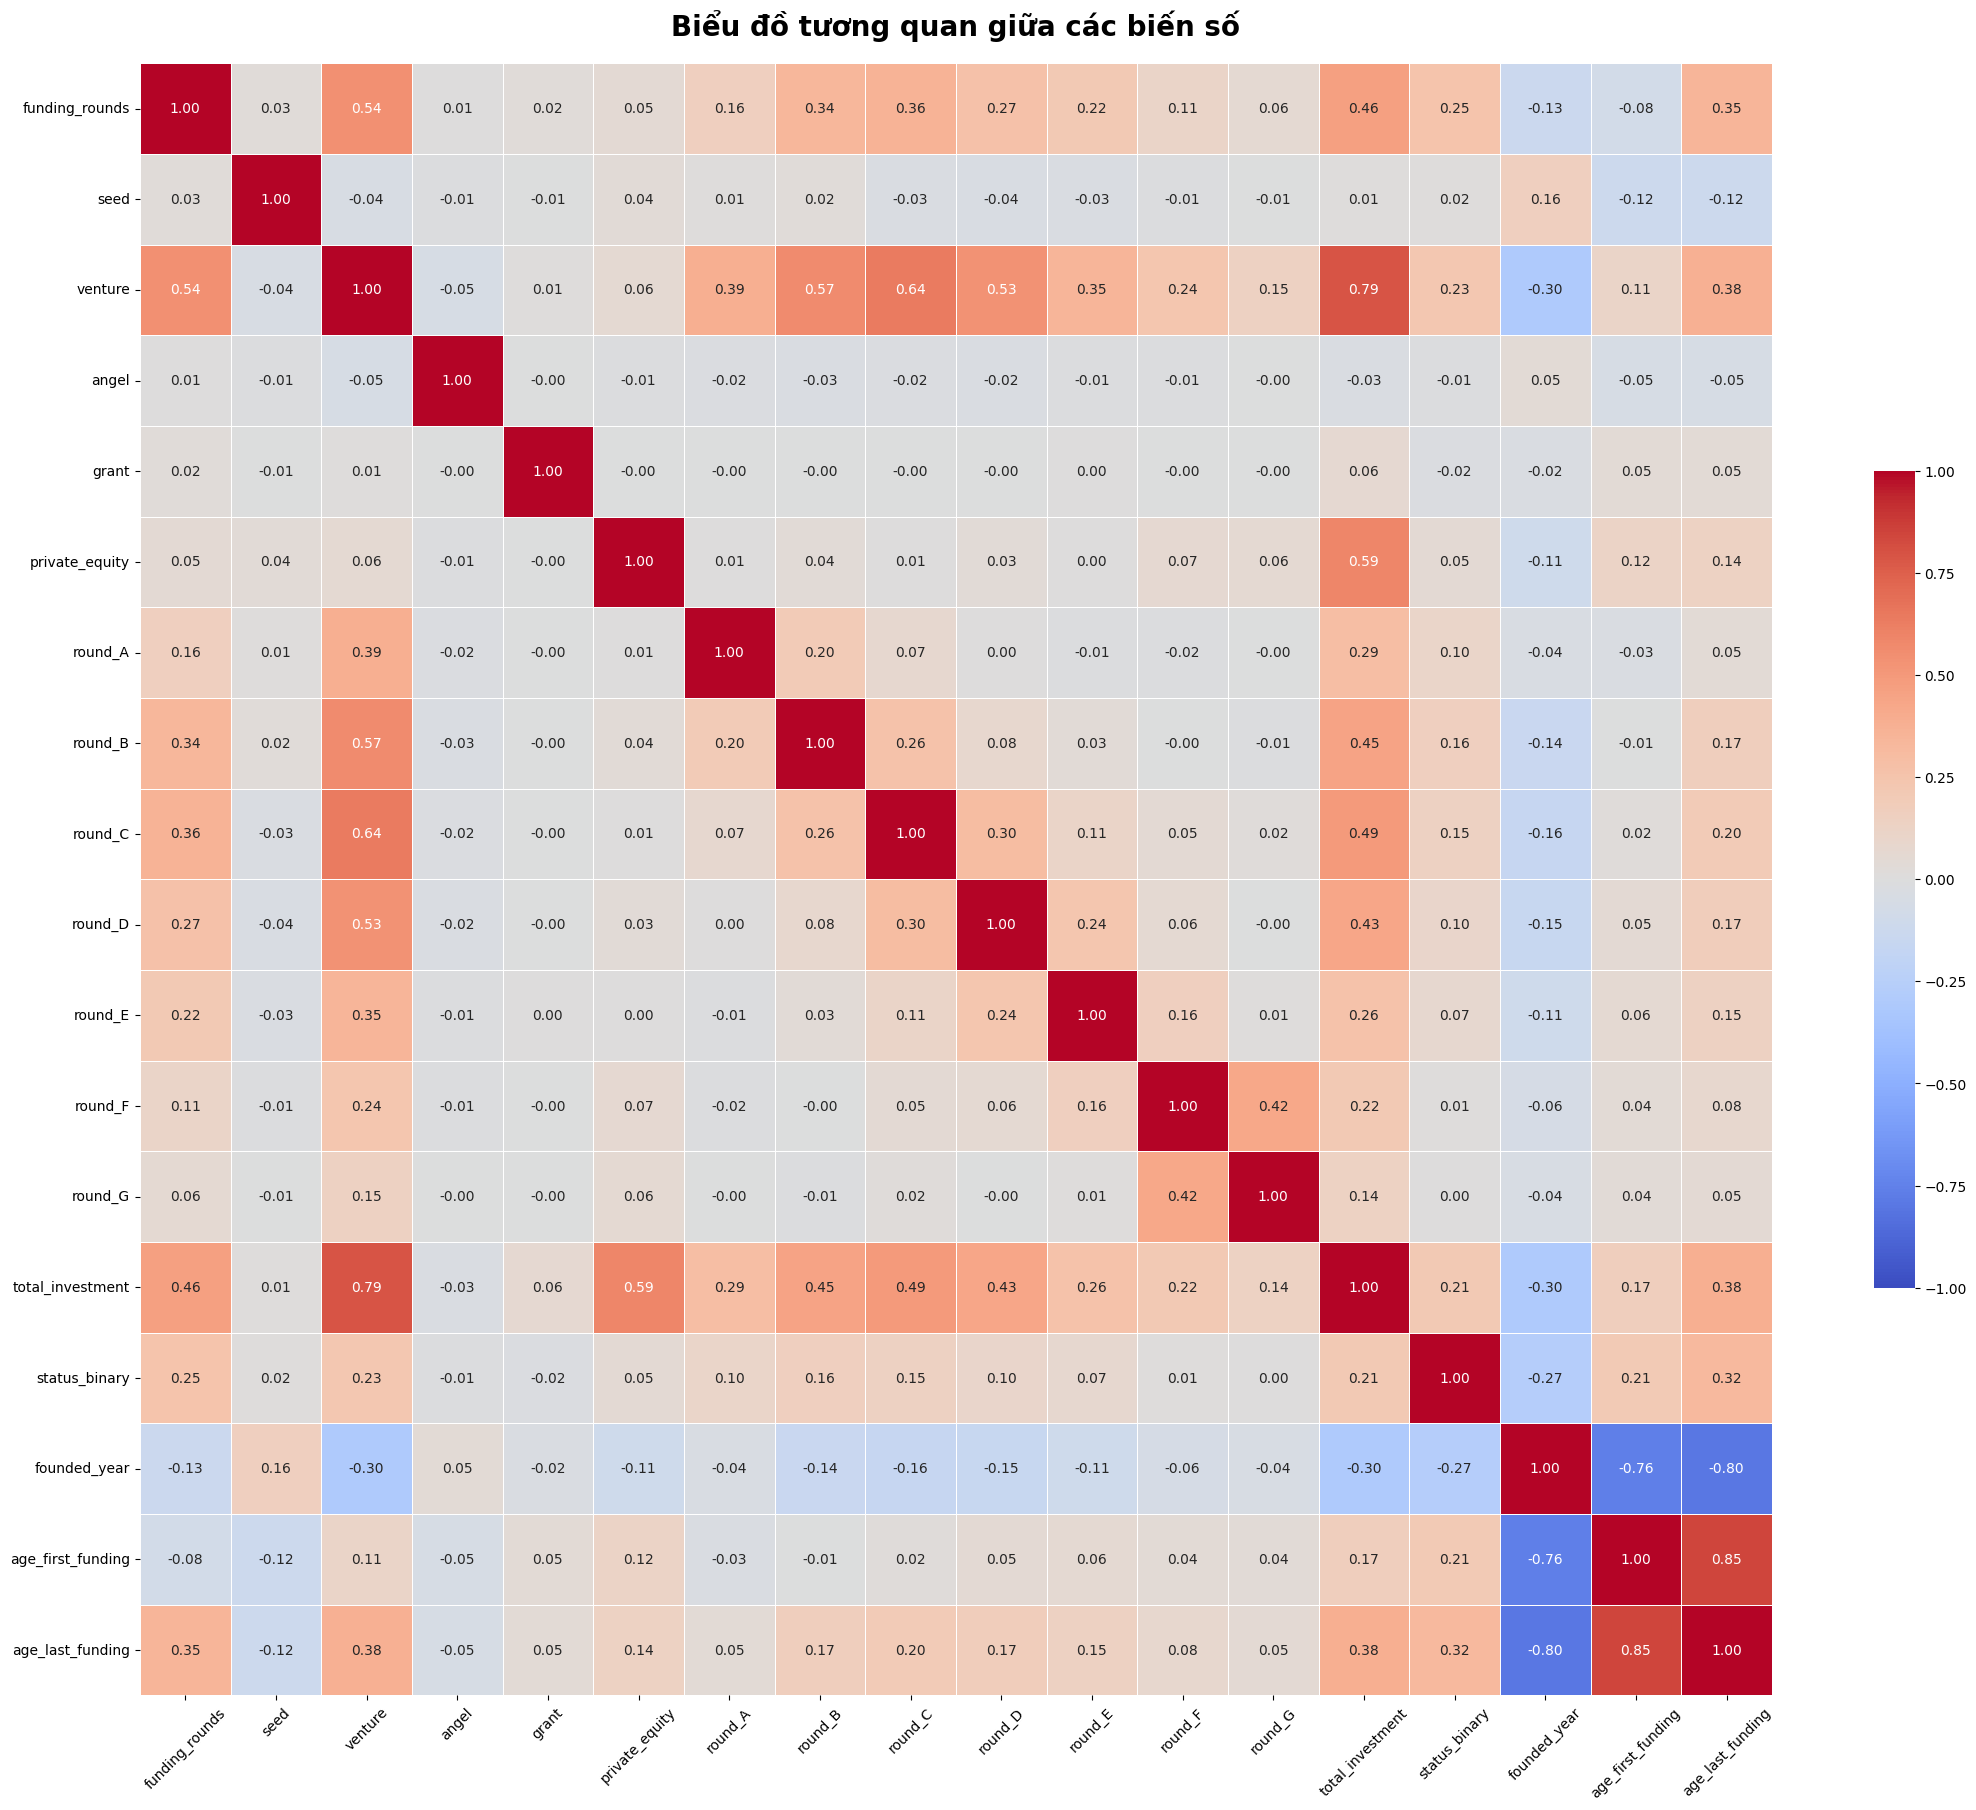

In [ ]:


# --- Loại bỏ cột có độ lệch chuẩn bằng 0 (toàn giá trị giống nhau) ---
numerical_df = df_clean.select_dtypes(include=['number'])
numerical_df = numerical_df.loc[:, numerical_df.std() != 0]

# --- Sắp xếp lại thứ tự cột nếu muốn nhóm logic hơn ---
cols_order = [
    'funding_rounds', 'seed', 'venture', 'angel', 'grant', 'private_equity',
    'round_A', 'round_B', 'round_C', 'round_D', 'round_E', 'round_F', 'round_G',
    'total_investment', 'status_binary',
    'founded_year','age_first_funding', 'age_last_funding'
]
cols_order = [col for col in cols_order if col in numerical_df.columns]
correlation_matrix = numerical_df[cols_order].corr()

# --- Vẽ heatmap với Figure lớn và tinh chỉnh đẹp ---
fig, ax = plt.subplots(figsize=(22, 18))  # Tùy chỉnh kích thước lớn hơn

sns.heatmap(
    correlation_matrix,
    annot=True, fmt=".2f", cmap='coolwarm',
    linewidths=0.5, vmin=-1, vmax=1,
    square=True,  # cho hình vuông đều
    cbar_kws={'shrink': 0.5},  # thanh màu nhỏ gọn hơn
    ax=ax
)

# --- Tùy chỉnh nhãn và tiêu đề ---
ax.set_title("Biểu đồ tương quan giữa các biến số", fontsize=20, fontweight='bold', pad=20)
ax.tick_params(axis='x', labelrotation=45, labelsize=10)
ax.tick_params(axis='y', labelsize=10)

plt.tight_layout()  # Giúp bố cục gọn gàng, không bị tràn
plt.show()




***Mối tương quan mạnh:***

**1. investment và venture (0.79):**
 Mối quan hệ tuyến tính mạnh nhất, cho thấy đầu tư mạo hiểm (venture) là nguồn vốn chính, liên quan chặt chẽ đến tổng số vốn đầu tư (investment).

**2. investment và equity (0.59):** Startup nhận nhiều đầu tư (investment) thường nhận vốn dưới dạng cổ phần (equity), thể hiện mối quan hệ tích cực.

**3. venture và các vòng gọi vốn:**

venture có tương quan mạnh với các vòng gọi vốn: round_C (0.64), round_B (0.57), round_D (0.53), round_A (0.39), round_E (0.35), round_F (0.24), round_G (0.15).

Đầu tư mạo hiểm thường được phân bổ qua nhiều vòng, đặc biệt ở các vòng lớn (round_C, round_B), nhưng tương quan giảm dần ở các vòng muộn (round_F, round_G) do ít startup đạt đến giai đoạn này.

**4. funding_rounds và các vòng gọi vốn:**

funding_rounds có tương quan dương với các vòng: round_C (0.36), round_B (0.34), round_D (0.27), round_E (0.22), round_A (0.16), round_F (0.11), round_G (0.06).

Startup có nhiều vòng gọi vốn (funding_rounds) thường tham gia nhiều vòng như round_A, round_B, nhưng tương quan giảm ở các vòng sau do ít startup tiến xa.

**5. investment và funding_rounds (0.46):** Startup có nhiều vòng gọi vốn thường nhận được nhiều đầu tư hơn, cho thấy mối quan hệ tích cực giữa số vòng gọi vốn và tổng vốn huy động.

***Mối tương quan âm:***

**investment và seed (-0.30):** Startup nhận nhiều vốn đầu tư lớn (investment) ít phụ thuộc vào vốn hạt giống (seed), có thể do đã vượt qua giai đoạn sơ khai.

**venture và seed (-0.33):** Đầu tư mạo hiểm (venture) có tương quan âm với seed, cho thấy startup nhận vốn mạo hiểm lớn thường không còn dựa vào vốn hạt giống, vì venture xuất hiện ở giai đoạn sau.

**equity và seed (-0.11):** Tương quan âm nhẹ, startup nhận đầu tư cổ phần (equity) ít liên quan đến seed, do vốn cổ phần thường xuất hiện ở các vòng gọi vốn sau.

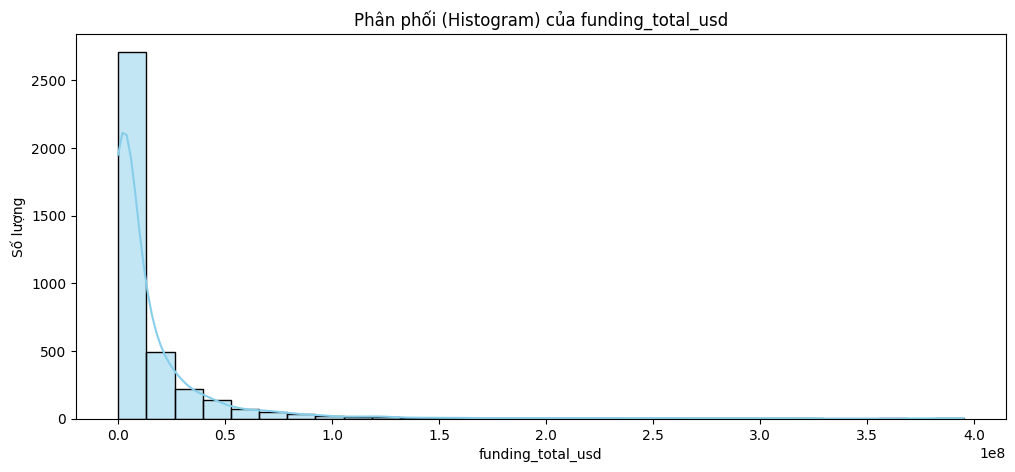

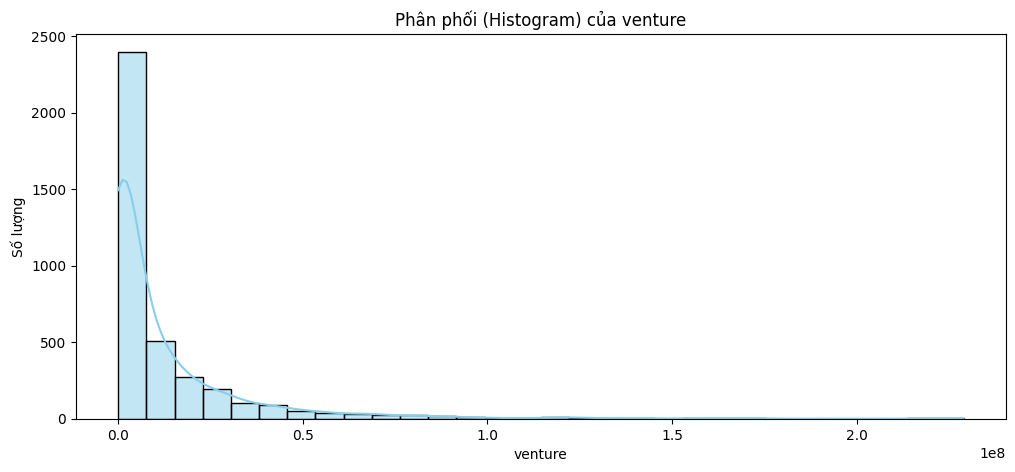

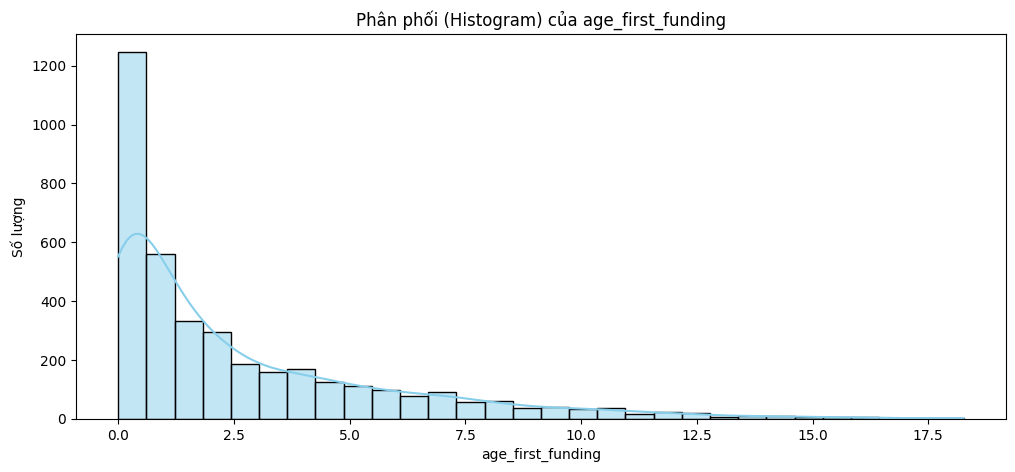

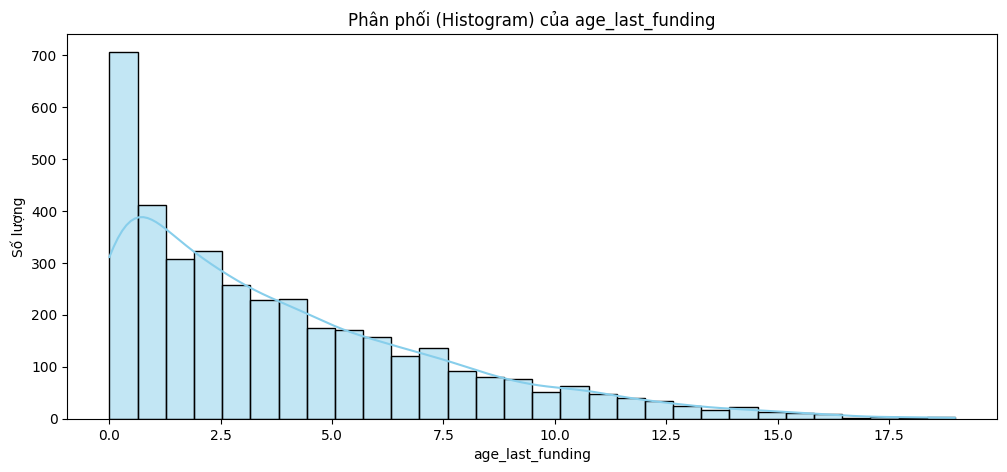

In [ ]:
# Danh sách cột cần vẽ
cols_to_plot = ['funding_total_usd', 'venture', 'age_first_funding', 'age_last_funding']

# Kiểm tra tồn tại của các cột và lọc trong df_clean
cols_to_plot = [col for col in cols_to_plot if col in df_clean.columns]

for col in cols_to_plot:
    plt.figure(figsize=(12, 5))

    # Histogram
    sns.histplot(df_clean[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Phân phối (Histogram) của {col}')
    plt.xlabel(col)
    plt.ylabel('Số lượng')


**1. Phân phối Histogram của funding total usd:**

*0 - 0.5 (0 đến 50 triệu USD):* Đây là khoảng có số lượng startup lớn nhất, với hơn 2500 startup. Điều này phản ánh rằng phần lớn các startup trong bộ dữ liệu chỉ huy động được số vốn nhỏ, có thể là từ các nguồn như vốn hạt giống (seed), đầu tư thiên thần (angel), hoặc các vòng gọi vốn sớm (round_A).

*0.5 - 1.0 (50 đến 100 triệu USD):* Số lượng startup giảm mạnh, chỉ còn khoảng vài trăm startup. Điều này cho thấy ít startup có khả năng huy động được số vốn lớn hơn 50 triệu USD, có thể do yêu cầu cao về tiềm năng tăng trưởng để thu hút các nhà đầu tư lớn.

*1.0 - 2.0 (100 đến 200 triệu USD):* Số lượng startup tiếp tục giảm, chỉ còn vài chục startup. Các startup ở mức này có thể đã vượt qua các vòng gọi vốn sớm và nhận được đầu tư mạo hiểm (venture) ở các vòng lớn hơn như round_B hoặc round_C.

*Trên 2.0 (trên 200 triệu USD):* Số lượng startup rất ít, gần như không đáng kể. Một số ít startup đạt được mức vốn đầu tư này có thể là các "unicorn" hoặc các công ty có tiềm năng tăng trưởng vượt trội, thu hút được các quỹ đầu tư lớn hoặc tiến đến các vòng gọi vốn muộn (round_D, round_E, v.v.).

**2. Phân phối Histogram của venture:**

*0 - 0.2 (0 đến 20 triệu USD):* Đây là khoảng có số lượng startup lớn nhất, với hơn 2500 startup. Điều này cho thấy phần lớn các startup hoặc không nhận được vốn đầu tư mạo hiểm (venture), hoặc chỉ nhận được số vốn nhỏ từ các quỹ đầu tư mạo hiểm ở giai đoạn rất sớm (ví dụ: round_A hoặc nhỏ hơn).

*0.2 - 0.5 (20 đến 50 triệu USD):* Số lượng startup giảm mạnh, chỉ còn khoảng vài trăm startup. Điều này cho thấy ít startup có khả năng thu hút được vốn đầu tư mạo hiểm từ 20 triệu USD trở lên, có thể do yêu cầu cao về tiềm năng tăng trưởng và khả năng thuyết phục các quỹ đầu tư mạo hiểm.

*0.5 - 1.0 (50 đến 100 triệu USD):* Số lượng startup tiếp tục giảm, chỉ còn vài chục startup. Các startup ở mức này có thể đã vượt qua giai đoạn sơ khai và nhận được đầu tư mạo hiểm ở các vòng lớn hơn như round_B hoặc round_C.

*Trên 1.0 (trên 100 triệu USD):* Số lượng startup rất ít, gần như không đáng kể, với một số ít startup nhận được vốn đầu tư mạo hiểm lên đến 2*USD (200 triệu ^8 USD). Các startup này có thể là những công ty có tiềm năng tăng trưởng vượt trội, hoạt động trong các lĩnh vực hấp dẫn như công nghệ, y tế, hoặc fintech, và thường nhận được đầu tư mạo hiểm ở các vòng gọi vốn muộn (round_D, round_E, v.v.).

**3. Phân phối Histogram của age fist funding:**

*0 - 1 năm:* Đây là khoảng có số lượng startup lớn nhất, với hơn 1200 startup. Điều này cho thấy phần lớn các startup nhận được vòng gọi vốn đầu tiên ngay trong năm đầu tiên sau khi thành lập. Điều này có thể phản ánh rằng các startup thường tìm kiếm vốn hạt giống (seed) hoặc đầu tư thiên thần (angel) ngay sau khi thành lập để phát triển ý tưởng hoặc sản phẩm ban đầu.

*1 - 3 năm:* Số lượng startup giảm mạnh, từ khoảng 600 xuống còn khoảng 200 startup. Các startup ở khoảng này có thể đã vượt qua giai đoạn sơ khai và nhận được vốn ở các vòng gọi vốn sớm như round_A.

*3 - 5 năm:* Số lượng startup tiếp tục giảm, dao động từ 100 đến 200 startup. Những startup này có thể đã hoạt động một thời gian trước khi thu hút được sự chú ý của nhà đầu tư, có thể do cần thời gian để chứng minh mô hình kinh doanh hoặc đạt được một số cột mốc quan trọng.

*Trên 5 năm:* Số lượng startup giảm dần, với rất ít startup nhận vòng gọi vốn đầu tiên sau 5 năm hoạt động. Một số ít startup nhận vốn khi đã hoạt động 10-20 năm, nhưng số lượng không đáng kể (dưới 50 startup). Những startup này có thể là các công ty hoạt động lâu nhưng mới tìm kiếm vốn để mở rộng hoặc chuyển đổi mô hình kinh doanh.

**4. Phân phối Histogram của age last funding:**

*0 - 1 năm:* Đây là khoảng có số lượng startup lớn nhất, với khoảng 700 startup. Điều này cho thấy nhiều startup nhận vòng gọi vốn cuối cùng ngay trong năm đầu tiên sau khi thành lập. Có thể những startup này chỉ nhận được một vòng vốn ban đầu (như seed hoặc angel) và không tiếp tục huy động vốn sau đó, có thể do thất bại, tự tài trợ (bootstrapped), hoặc bị mua lại.

*1 - 5 năm:* Số lượng startup giảm dần nhưng vẫn đáng kể, dao động từ khoảng 400 xuống còn khoảng 100 startup. Các startup ở khoảng này có thể đã trải qua một số vòng gọi vốn (như round_A, round_B) và nhận vòng gọi vốn cuối cùng trong giai đoạn phát triển sớm. Đây là giai đoạn phổ biến để các startup tiếp tục huy động vốn mạo hiểm (venture) nhằm mở rộng quy mô.

*5 - 10 năm:* Số lượng startup tiếp tục giảm, dao động từ khoảng 50 đến 100 startup. Những startup này có thể đã hoạt động một thời gian dài trước khi nhận vòng gọi vốn cuối cùng, có thể do cần vốn để mở rộng thêm hoặc chuyển đổi mô hình kinh doanh sau khi đã đạt được một số thành tựu nhất định.

*Trên 10 năm:* Số lượng startup rất ít, dưới 50 startup, với một số ít nhận vòng gọi vốn cuối cùng sau 15-20 năm hoạt động. Những startup này có thể là các công ty lâu năm tìm kiếm vốn để tái cấu trúc, mở rộng thị trường, hoặc chuẩn bị cho các sự kiện lớn như IPO (phát hành cổ phiếu lần đầu ra công chúng).

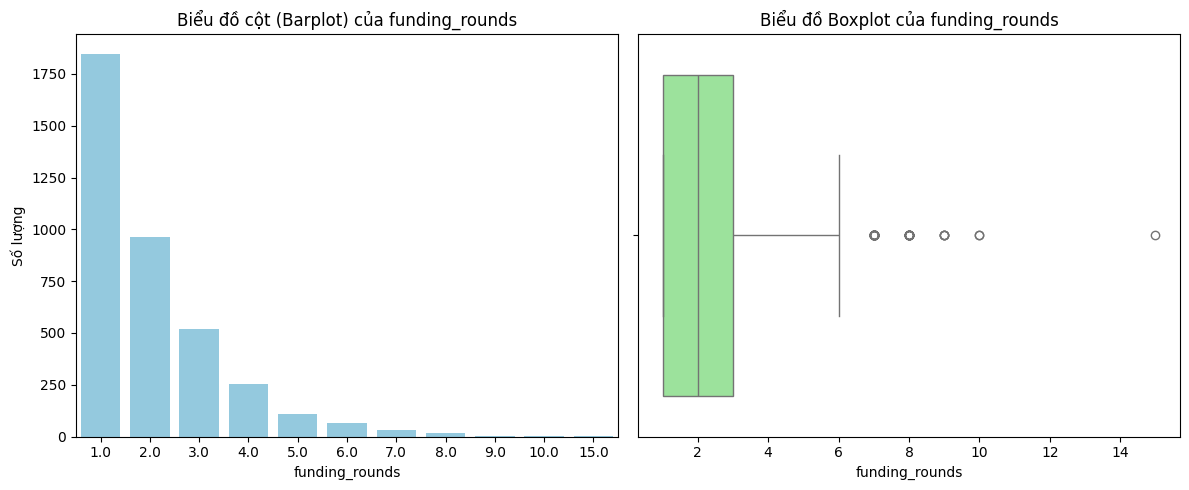

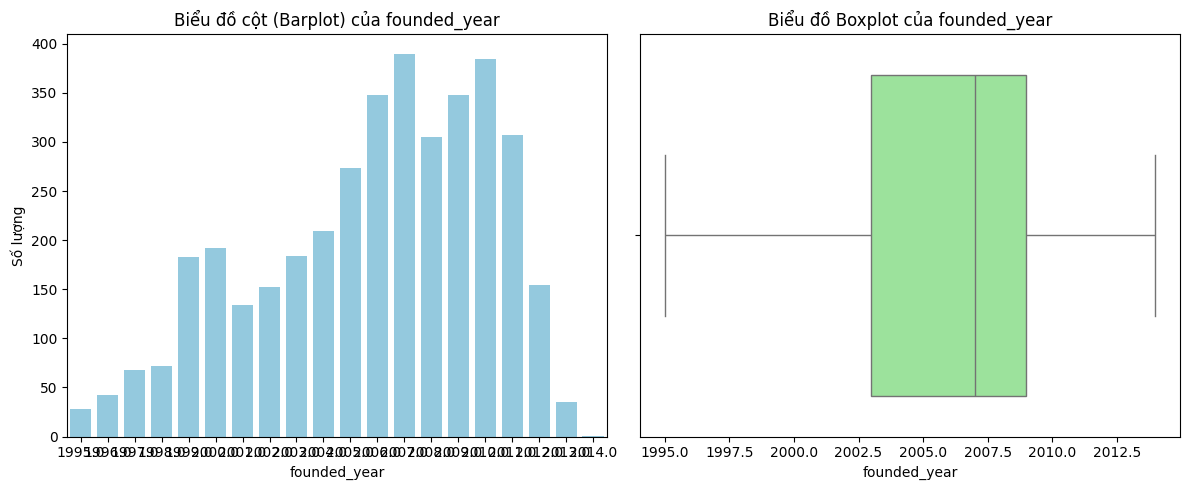

In [ ]:
# Các cột cần vẽ
cols_to_plot_box = ['funding_rounds', 'founded_year']

# Kiểm tra tồn tại của các cột và lọc trong df_clean
cols_to_plot_box = [col for col in cols_to_plot_box if col in df_clean.columns]

for col in cols_to_plot_box:
    plt.figure(figsize=(12, 5))

    # Barplot
    plt.subplot(1, 2, 1)
    sns.countplot(data=df_clean, x=col, color='skyblue')
    plt.title(f'Biểu đồ cột (Barplot) của {col}')
    plt.xlabel(col)
    plt.ylabel('Số lượng')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df_clean[col], color='lightgreen')
    plt.title(f'Biểu đồ Boxplot của {col}')
    plt.xlabel(col)

    plt.tight_layout()
    plt.show()

**1. Biểu đồ cột của funding_rounds:**

*1 vòng gọi vốn:* Đây là khoảng có số lượng startup lớn nhất, với hơn 2000 startup. Điều này cho thấy nhiều startup chỉ nhận được một vòng gọi vốn duy nhất, có thể do chỉ cần một lượng vốn nhỏ để khởi đầu hoặc không thể tiếp tục thu hút đầu tư sau vòng đầu tiên (do thất bại, tự tài trợ, hoặc bị mua lại sớm).

*2 - 3 vòng gọi vốn:* Số lượng startup giảm mạnh, dao động từ khoảng 1000 xuống còn khoảng 500 startup. Các startup ở khoảng này có thể đã vượt qua giai đoạn sơ khai và nhận thêm các vòng gọi vốn như round_A hoặc round_B để mở rộng quy mô.

*4 - 5 vòng gọi vốn:* Số lượng startup tiếp tục giảm, chỉ còn khoảng 200-300 startup. Những startup này có thể đã phát triển ổn định, thu hút được đầu tư mạo hiểm (venture) qua các vòng lớn hơn như round_C hoặc round_D.

*Trên 5 vòng gọi vốn:* Số lượng startup rất ít, dưới 100 startup, với một số ít startup có đến 15-20 vòng gọi vốn. Những startup này có thể là các công ty lớn, hoạt động trong các lĩnh vực tiềm năng cao (như công nghệ, y tế, hoặc fintech), và có lộ trình gọi vốn dài để hỗ trợ tăng trưởng liên tục hoặc chuẩn bị cho các sự kiện lớn như IPO (phát hành cổ phiếu lần đầu ra công chúng).

**2. Biểu đồ cột của funding_years:**

*1980 - 2000:* Số lượng startup nhận vốn trong giai đoạn này rất thấp, dao động từ 0 đến khoảng 200 startup mỗi năm. Điều này cho thấy hoạt động gọi vốn trong hệ sinh thái khởi nghiệp thời kỳ này chưa phát triển mạnh, có thể do hệ sinh thái khởi nghiệp còn sơ khai, với ít quỹ đầu tư mạo hiểm (venture) hoặc nhà đầu tư thiên thần (angel) tham gia

*2001 - 2005:* Số lượng startup nhận vốn bắt đầu tăng nhẹ, dao động từ khoảng 200 đến 500 startup mỗi năm. Đây có thể là giai đoạn khởi đầu của sự phát triển trong hệ sinh thái khởi nghiệp, có thể liên quan đến sự bùng nổ của các công nghệ internet (dot-com boom) và sự gia tăng của các quỹ đầu tư mạo hiểm.

*2006 - 2012:* Đây là giai đoạn cao điểm, với số lượng startup nhận vốn tăng mạnh, từ khoảng 500 lên đến hơn 3000 startup mỗi năm vào năm 2012. Đỉnh cao được ghi nhận vào khoảng năm 2012-2013, khi số lượng startup đạt hơn 3000. Điều này phản ánh sự phát triển mạnh mẽ của hệ sinh thái khởi nghiệp toàn cầu, đặc biệt trong các lĩnh vực công nghệ, cùng với sự gia tăng của các quỹ đầu tư mạo hiểm và các nền tảng hỗ trợ khởi nghiệp.

*2013 - 2014:* Số lượng startup nhận vốn giảm nhẹ, từ hơn 3000 xuống còn khoảng 2000 startup. Sự sụt giảm này có thể do thị trường khởi nghiệp bắt đầu bão hòa ở một số khu vực, hoặc các nhà đầu tư trở nên thận trọng hơn sau giai đoạn bùng nổ.

In [ ]:
# Hàm định dạng số lớn
def format_number(num):
    try:
        num = float(num)
        if num >= 1e9:
            return f"{num / 1e9:.1f} tỷ"
        elif num >= 1e6:
            return f"{num / 1e6:.1f} triệu"
        elif num >= 1e3:
            return f"{num / 1e3:.1f} nghìn"
        return f"{num:.0f}"
    except:
        return "0"

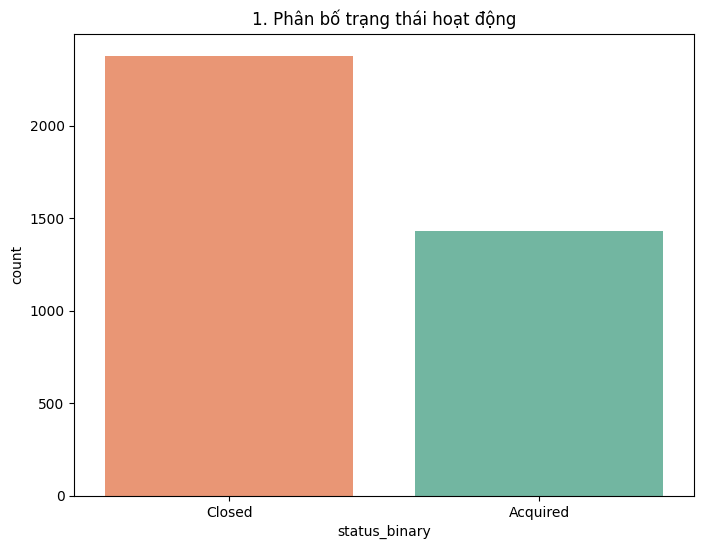

In [ ]:
# 1. Phân bố trạng thái hoạt động


plt.figure(figsize=(8, 6))
sns.countplot(data=df_clean, x='status_binary', hue='status_binary', order=df_clean['status_binary'].value_counts().index, palette='Set2', legend=False)
plt.title("1. Phân bố trạng thái hoạt động")
plt.xticks([0, 1], ['Closed', 'Acquired'])
plt.show()


Closed (màu cam): Số lượng startup thuộc nhóm này cao hơn đáng kể, với khoảng 2000 công ty. Điều này cho thấy trong tập dữ liệu, có nhiều startup đã ngừng hoạt động hoặc phá sản hơn so với những startup được mua lại.

Acquired (màu xanh lam): Số lượng startup được mua lại thấp hơn, với khoảng 1500 công ty. Điều này cho thấy tỷ lệ startup thành công đến mức được mua lại thấp hơn so với tỷ lệ thất bại (đóng cửa).

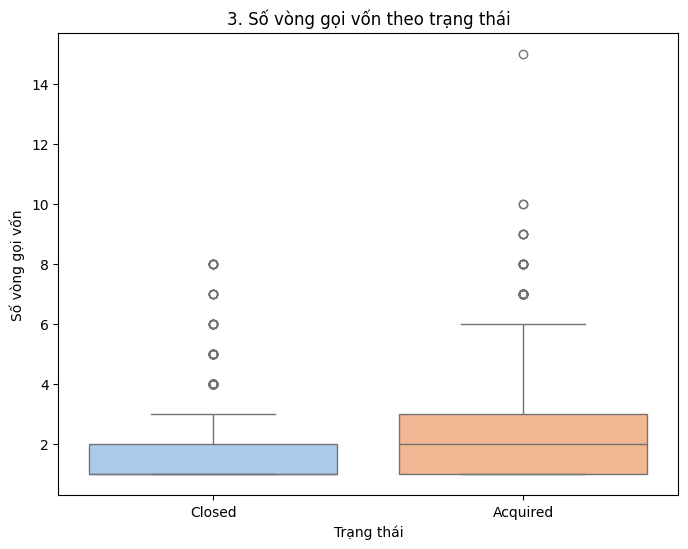

In [ ]:
# 2. Số vòng gọi vốn theo trạng thái
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_clean, x='status_binary', y='funding_rounds', hue='status_binary', palette='pastel', legend=False)
plt.title("3. Số vòng gọi vốn theo trạng thái")
plt.xticks([0, 1], ['Closed', 'Acquired'])
plt.xlabel("Trạng thái")
plt.ylabel("Số vòng gọi vốn")
plt.show()

**Closed (màu xanh lam):**

Hộp (box) nằm ở mức từ khoảng 1 đến 2 vòng gọi vốn, với trung vị (median) khoảng 1 vòng.

Phân bố khá hẹp, cho thấy phần lớn các startup đã đóng cửa chỉ có từ 1 đến 2 vòng gọi vốn.

Có một số giá trị ngoại lai (outliers) ở mức 4, 5, 6, và 8 vòng, nhưng số lượng rất ít. Điều này cho thấy hiếm có startup đóng cửa nào huy động được nhiều vòng vốn.

**Acquired (màu cam):**

Hộp nằm ở mức từ khoảng 2 đến 3 vòng gọi vốn, với trung vị khoảng 2 vòng.
Phân bố rộng hơn so với nhóm Closed, cho thấy các startup được mua lại có xu hướng huy động được nhiều vòng vốn hơn.

Có nhiều giá trị ngoại lai hơn, từ 4 đến 14 vòng gọi vốn, với mật độ cao hơn ở mức 4 đến 8 vòng. Điều này cho thấy một số startup được mua lại đã huy động được nhiều vòng vốn đáng kể trước khi được mua.

<Figure size 1000x600 with 0 Axes>

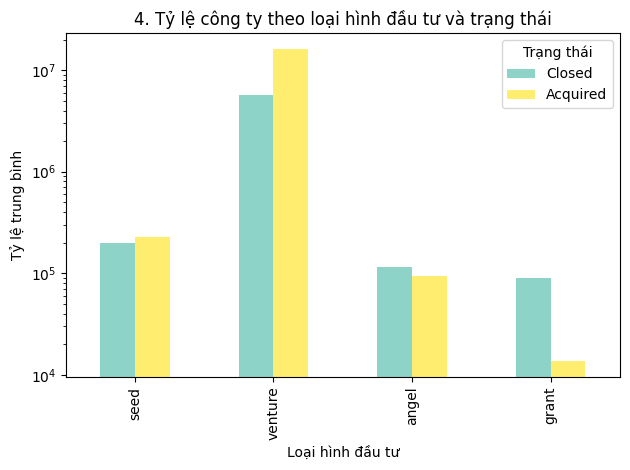

In [ ]:
# 3. Loại hình đầu tư theo trạng thái
plt.figure(figsize=(10, 6))
investment_types = ['seed', 'venture', 'angel', 'grant']
inv_status = df_clean.groupby('status_binary')[investment_types].mean().T
inv_status.columns = ['Closed', 'Acquired']
inv_status.plot(kind='bar', colormap='Set3')
plt.yscale('log')
plt.title("4. Tỷ lệ công ty theo loại hình đầu tư và trạng thái")
plt.ylabel("Tỷ lệ trung bình")
plt.xlabel("Loại hình đầu tư")
plt.legend(title="Trạng thái")
plt.tight_layout()
plt.show()
## dung log


***Seed (Vốn hạt giống):***

Cả hai trạng thái Closed và Acquired đều có tỷ lệ tương đối cao, với số lượng công ty nằm trong khoảng 10^5 (100,000).

Số lượng startup Closed và Acquired ở loại hình đầu tư này khá tương đồng, cho thấy vốn hạt giống là loại hình đầu tư phổ biến cho cả hai nhóm.

***Venture (Vốn mạo hiểm):***

Đây là loại hình đầu tư có tỷ lệ cao nhất trong cả hai trạng thái.

Số lượng startup Acquired (màu xanh lam) cao hơn đáng kể so với Closed (màu vàng), với tỷ lệ đạt khoảng 10^7 (10,000,000) cho nhóm Acquired, trong khi nhóm Closed chỉ khoảng 10^6 (1,000,000).

Điều này cho thấy các startup nhận được vốn mạo hiểm có khả năng được mua lại cao hơn so với việc đóng cửa.

***Angel (Vốn thiên thần):***

Số lượng startup nhận vốn thiên thần thấp hơn so với Seed và Venture, với tỷ lệ nằm trong khoảng 10^5 (100,000).

Số lượng startup Closed và Acquired ở loại hình này cũng khá tương đồng, nhưng thấp hơn so với Venture, cho thấy vốn thiên thần có thể không phải là yếu tố chính quyết định sự thành công hay thất bại.

***Grant (Tài trợ):***

Đây là loại hình đầu tư có tỷ lệ thấp nhất.

Số lượng startup Acquired nhận tài trợ rất thấp, chỉ khoảng 10^3 (1,000), trong khi số lượng startup Closed cũng thấp nhưng cao hơn một chút, khoảng 10^4 (10,000).

Điều này cho thấy các khoản tài trợ (Grant) không phổ biến và dường như không có tác động lớn đến việc startup được mua lại.

<ipython-input-373-b2df43b6ef15>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_market_funding, x='funding_total_usd', y='market', palette='viridis')
<ipython-input-373-b2df43b6ef15>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_country_funding, x='funding_total_usd', y='country_code', palette='magma')


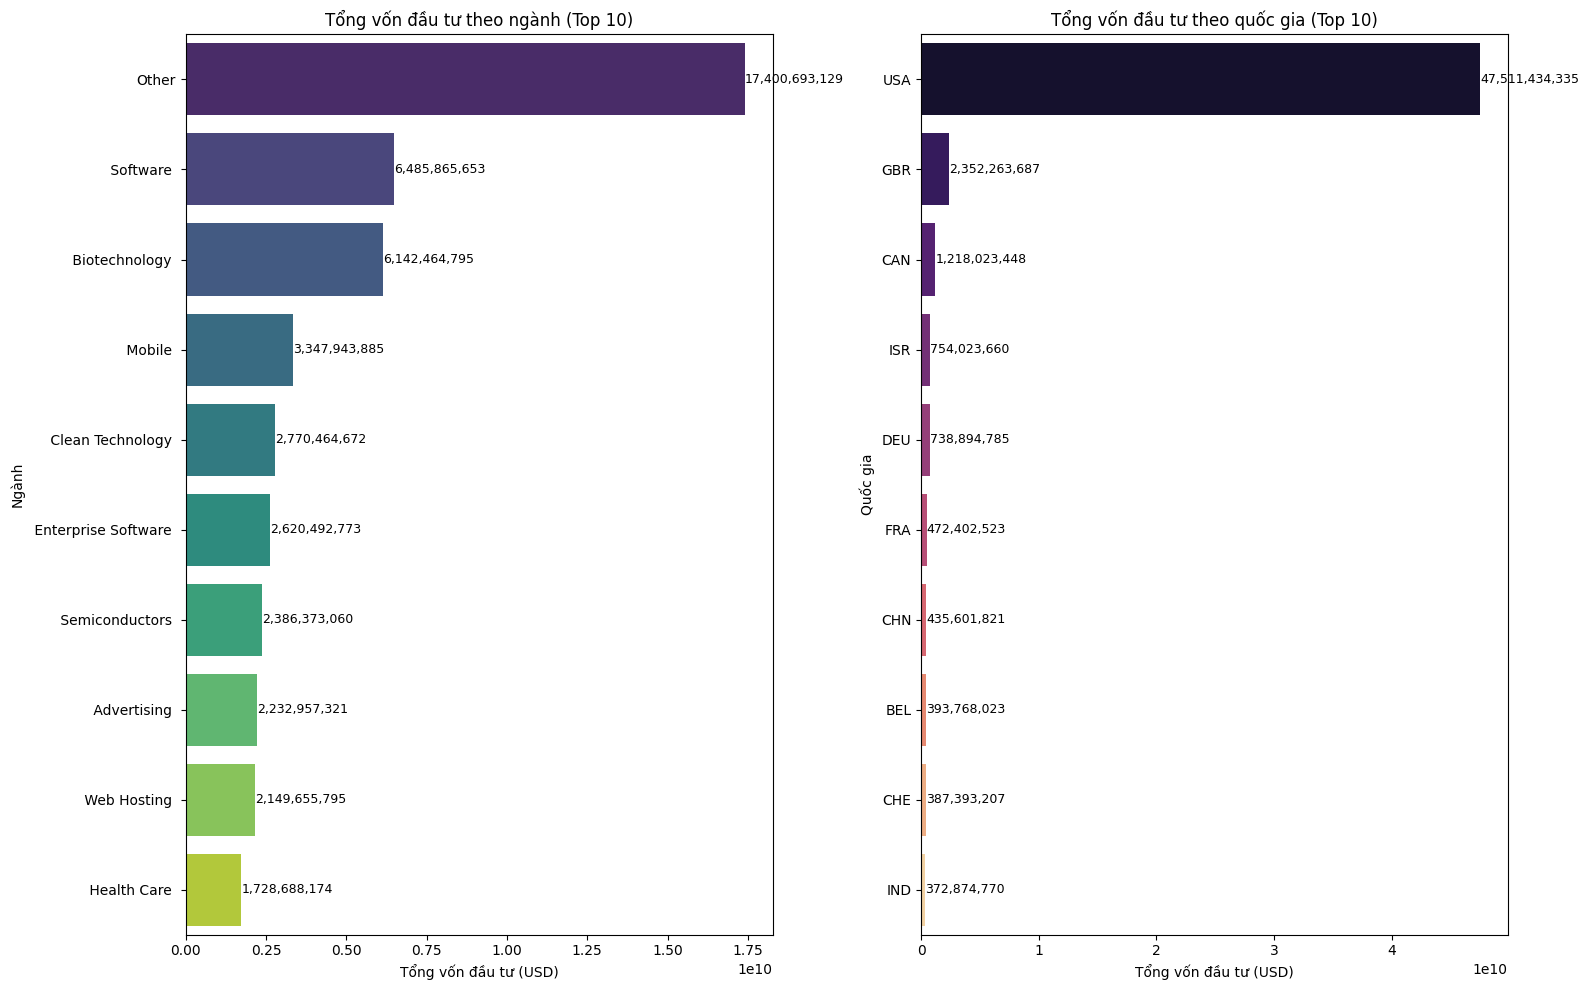

In [ ]:



# Chuẩn bị dữ liệu
top_market_funding = df_clean.groupby('market')['funding_total_usd'].sum().sort_values(ascending=False).head(10).reset_index()
top_country_funding = df_clean.groupby('country_code')['funding_total_usd'].sum().sort_values(ascending=False).head(10).reset_index()

# Thiết lập figure
plt.figure(figsize=(16, 10))

# --- Biểu đồ 1: Tổng vốn đầu tư theo ngành ---
plt.subplot(1, 2, 1)
sns.barplot(data=top_market_funding, x='funding_total_usd', y='market', palette='viridis')
plt.title("Tổng vốn đầu tư theo ngành (Top 10)")
plt.xlabel("Tổng vốn đầu tư (USD)")
plt.ylabel("Ngành")

# Thêm nhãn vào đầu cột
for i, v in enumerate(top_market_funding['funding_total_usd']):
    plt.text(v, i, f'{int(v):,}', va='center', ha='left', fontsize=9)

# --- Biểu đồ 2: Tổng vốn đầu tư theo quốc gia ---
plt.subplot(1, 2, 2)
sns.barplot(data=top_country_funding, x='funding_total_usd', y='country_code', palette='magma')
plt.title("Tổng vốn đầu tư theo quốc gia (Top 10)")
plt.xlabel("Tổng vốn đầu tư (USD)")
plt.ylabel("Quốc gia")

# Thêm nhãn vào đầu cột
for i, v in enumerate(top_country_funding['funding_total_usd']):
    plt.text(v, i, f'{int(v):,}', va='center', ha='left', fontsize=9)

plt.tight_layout()
plt.show()




Đang hoạt động: 58.2% công ty khởi nghiệp vẫn đang hoạt động. Đây là tỷ lệ lớn hơn một chút so với nhóm ngừng hoạt động, cho thấy hơn một nửa các công ty trong tập dữ liệu vẫn duy trì hoạt động, phản ánh một hệ sinh thái khởi nghiệp có sức sống khá tốt.

Ngừng hoạt động: 41.8% công ty đã ngừng hoạt động. Tỷ lệ này khá cao, cho thấy gần một nửa số công ty khởi nghiệp không thể tiếp tục hoạt động, có thể do các yếu tố như thiếu vốn, cạnh tranh cao, hoặc không đáp ứng được nhu cầu thị trường.

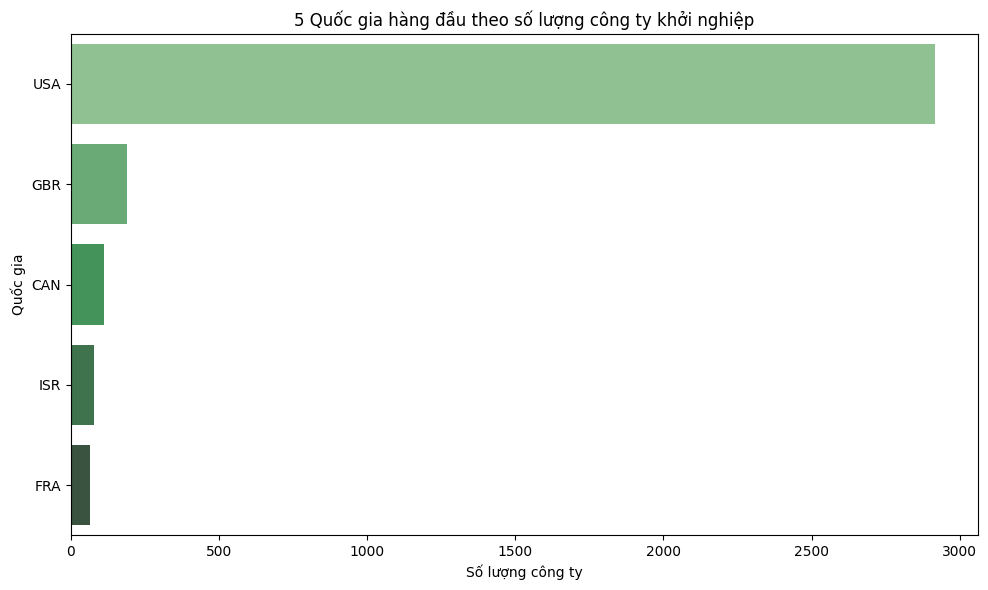

In [ ]:
#  Biểu đồ cột: 5 quốc gia hàng đầu theo số công ty
top_countries = df_clean['country_code'].value_counts().nlargest(5).reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=top_countries, x='count', y='country_code', hue='country_code', palette='Greens_d')
plt.title('5 Quốc gia hàng đầu theo số lượng công ty khởi nghiệp')
plt.xlabel('Số lượng công ty')
plt.ylabel('Quốc gia')
plt.tight_layout()
plt.show()

USA (Mỹ): Dẫn đầu với số lượng công ty khởi nghiệp lớn nhất, gần 3000 công ty. Điều này không bất ngờ vì Mỹ là một trung tâm khởi nghiệp toàn cầu, với các khu vực như Thung lũng Silicon (SF Bay Area) nổi tiếng về đổi mới công nghệ.

GBR (Anh): Đứng thứ hai với khoảng 500 công ty. Anh là một trung tâm khởi nghiệp lớn ở châu Âu, đặc biệt tại London, nơi có hệ sinh thái công nghệ phát triển mạnh.

CAN (Canada): Đứng thứ ba với khoảng 400 công ty. Canada cũng là một thị trường khởi nghiệp nổi bật, với các thành phố như Toronto và Vancouver thu hút nhiều công ty công nghệ.

DEU (Đức): Đứng thứ tư với khoảng 300 công ty. Đức là một quốc gia mạnh về công nghiệp và công nghệ ở châu Âu, với Berlin là trung tâm khởi nghiệp lớn.

ISR (Israel): Đứng thứ năm với số lượng công ty ít hơn, khoảng 200. Israel, dù là một quốc gia nhỏ, nổi tiếng với hệ sinh thái khởi nghiệp công nghệ cao, thường được gọi là "Startup Nation".

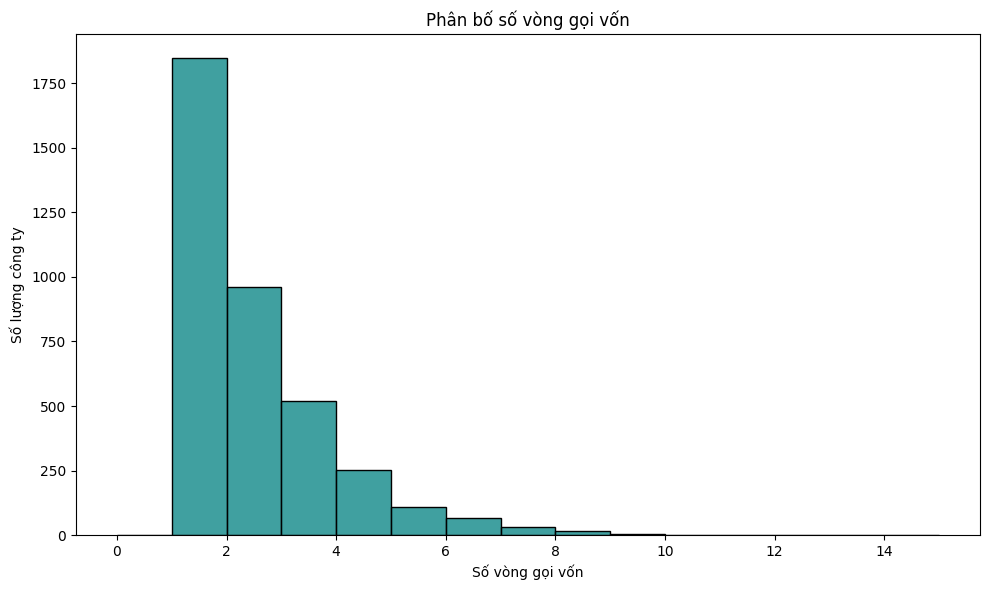

In [ ]:
#  Biểu đồ histogram: Phân bố số vòng gọi vốn (nếu có funding_rounds)
if 'funding_rounds' in df_clean.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df_clean['funding_rounds'], bins=range(int(df_clean['funding_rounds'].max()) + 1), kde=False, color='teal')
    plt.title('Phân bố số vòng gọi vốn')
    plt.xlabel('Số vòng gọi vốn')
    plt.ylabel('Số lượng công ty')
    plt.tight_layout()
    plt.savefig(os.path.join(output_dir, 'funding_rounds_histogram.png'))
    plt.show()
else:
    print("Bỏ qua biểu đồ phân bố vòng gọi vốn do thiếu cột 'funding_rounds'.")

Tập trung ở số vòng gọi vốn thấp: Phần lớn các công ty khởi nghiệp chỉ có 1 vòng gọi vốn, với số lượng công ty đạt đỉnh khoảng 2000 công ty. Điều này cho thấy nhiều công ty khởi nghiệp chỉ nhận được tài trợ một lần, có thể là vòng hạt giống (seed) hoặc vòng đầu tiên (round A).

Giảm dần theo số vòng: Số lượng công ty giảm mạnh khi số vòng gọi vốn tăng:

Khoảng 1000 công ty có 2 vòng gọi vốn.

Dưới 500 công ty có 3 vòng gọi vốn.

Rất ít công ty có từ 4 vòng trở lên, với số lượng giảm dần đều và gần như không có công ty nào có hơn 10 vòng gọi vốn.

Đuôi dài bên phải (right-skewed): Phân bố này có dạng lệch phải, đặc trưng cho các biến như số vòng gọi vốn, khi phần lớn công ty có ít vòng gọi vốn, và chỉ một số ít công ty có nhiều vòng (có thể là các công ty thành công lớn hoặc hoạt động lâu dài).

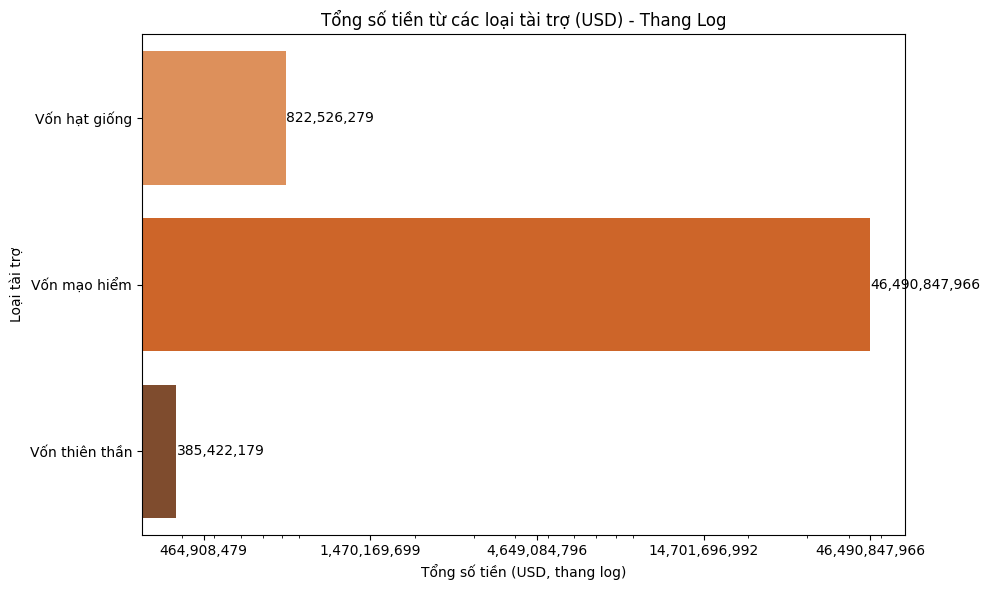

In [ ]:
def format_number(x):
    return f"{x:,.0f}"

# Kiểm tra xem các cột cần thiết có trong DataFrame không
if all(col in df_clean.columns for col in ['seed', 'venture', 'angel']):
    # Tạo DataFrame cho biểu đồ
    funding_types = pd.DataFrame({
        'Loại tài trợ': ['Vốn hạt giống', 'Vốn mạo hiểm', 'Vốn thiên thần'],
        'Tổng số tiền': [df_clean['seed'].sum(), df_clean['venture'].sum(), df_clean['angel'].sum()]
    })

    # Tạo biểu đồ
    plt.figure(figsize=(10, 6))
    sns.barplot(data=funding_types, x='Tổng số tiền', y='Loại tài trợ', hue='Loại tài trợ', palette='Oranges_d', legend=False)

    # Áp dụng thang log cho trục x
    plt.xscale('log')

    # Đặt tiêu đề và nhãn
    plt.title('Tổng số tiền từ các loại tài trợ (USD) - Thang Log')
    plt.xlabel('Tổng số tiền (USD, thang log)')
    plt.ylabel('Loại tài trợ')

    # Tùy chỉnh các điểm trên trục x
    max_value = funding_types['Tổng số tiền'].max()
    if max_value > 0:  # Đảm bảo max_value không âm (log không áp dụng được cho 0 hoặc số âm)
        # Tạo các điểm trên trục x theo thang log
        log_ticks = np.logspace(np.log10(max_value / 100), np.log10(max_value), num=5)
        plt.xticks(log_ticks, [format_number(int(x)) for x in log_ticks])
    else:
        print("Không thể áp dụng thang log do tổng số tiền không dương.")

    # Thêm giá trị trên mỗi cột
    for i, v in enumerate(funding_types['Tổng số tiền']):
        plt.text(v, i, format_number(int(v)), va='center', ha='left', color='black', fontsize=10)

    plt.tight_layout()
    plt.show()
else:
    print("Bỏ qua biểu đồ loại tài trợ do thiếu một hoặc nhiều cột: 'seed', 'venture', 'angel'.")

Vốn mạo hiểm (Venture): Dẫn đầu với tổng số tiền khoảng 21.4 tỷ USD. Đây là loại tài trợ lớn nhất, chiếm phần lớn trong các nguồn tài trợ, cho thấy các nhà đầu tư mạo hiểm đóng vai trò quan trọng trong việc hỗ trợ các công ty khởi nghiệp phát triển, đặc biệt ở giai đoạn mở rộng.

Vốn hạt giống (Seed): Đứng thứ hai với khoảng 4.3 tỷ USD. Mặc dù thấp hơn nhiều so với vốn mạo hiểm, con số này vẫn đáng kể, phản ánh rằng nhiều công ty khởi nghiệp nhận được tài trợ ban đầu để khởi động hoạt động.

Vốn thiên thần (Angel): Đứng cuối với khoảng 1.8 tỷ USD (dựa trên ước lượng từ biểu đồ). Vốn thiên thần thường đến từ các nhà đầu tư cá nhân, và con số này cho thấy loại tài trợ này ít phổ biến hơn so với vốn mạo hiểm và vốn hạt giống.

<ipython-input-377-e36bb8368a7c>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_counts.index, y=age_counts.values, palette='coolwarm')


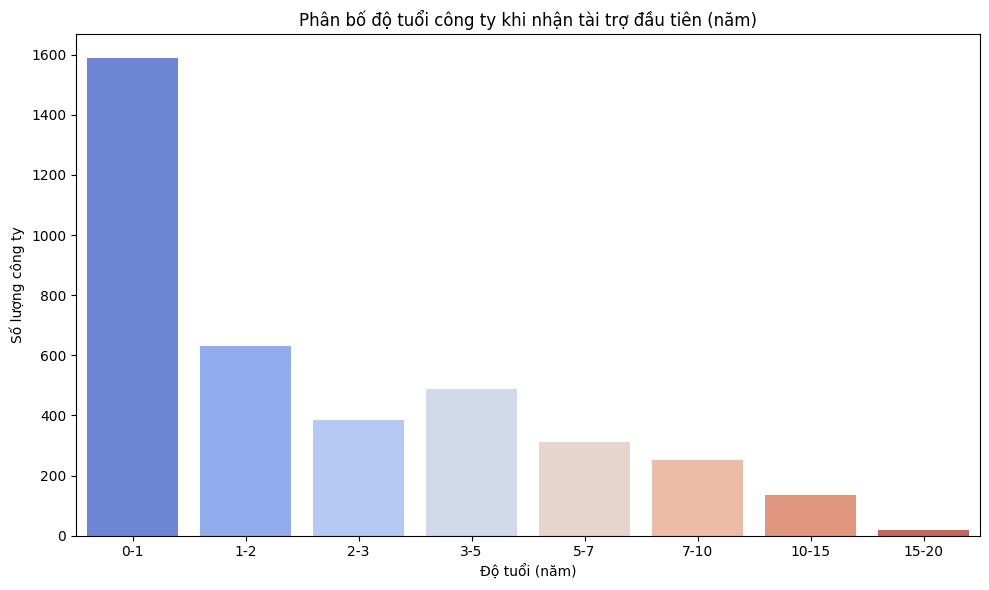

In [ ]:
#  Biểu đồ thanh: Phân bố độ tuổi công ty khi nhận tài trợ đầu tiên
if 'age_first_funding' in df_clean.columns:
    # Cắt độ tuổi thành các khoảng
    bins = [0, 1, 2, 3, 5, 7, 10, 15, 20]  # khoảng tuổi
    labels = ['0-1', '1-3', '3-5', '5-10', '10-20']
    df_clean['age_first_funding_bin'] = pd.cut(df_clean['age_first_funding'], bins=bins, labels=labels, right=False)

    # Đếm số lượng trong mỗi khoảng
    age_counts = df_clean['age_first_funding_bin'].value_counts().sort_index()

    # Vẽ biểu đồ bar chart
    plt.figure(figsize=(10, 6))
    sns.barplot(x=age_counts.index, y=age_counts.values, palette='coolwarm')

    plt.title('Phân bố độ tuổi công ty khi nhận tài trợ đầu tiên (năm)')
    plt.xlabel('Độ tuổi (năm)')
    plt.ylabel('Số lượng công ty')
    plt.tight_layout()
8    plt.show()

**Độ tuổi 0-1 năm:** Đây là nhóm phổ biến nhất, với số lượng công ty vượt quá 1500. Điều này cho thấy phần lớn các công ty nhận được đầu tư trong năm đầu tiên sau khi thành lập. Đây có thể là giai đoạn các startup cần vốn để khởi động hoạt động.

**Độ tuổi 1-2 năm:** Số lượng công ty giảm xuống, nhưng vẫn khá cao, khoảng 600 công ty. Điều này cho thấy nhiều startup tiếp tục nhận đầu tư trong năm thứ hai, có thể để mở rộng hoặc phát triển sản phẩm.

**Độ tuổi 2-3 năm:** Số lượng công ty giảm tiếp, xuống khoảng 400 công ty. Điều này cho thấy xu hướng nhận đầu tư bắt đầu giảm khi công ty bước sang năm thứ ba.
Độ tuổi 3-5 năm: Số lượng công ty tiếp tục giảm, khoảng 300 công ty. Ở giai đoạn này, có thể một số công ty đã tự đứng vững hoặc không còn hấp dẫn nhà đầu tư.

**Độ tuổi 5-7 năm:** Số lượng công ty giảm mạnh, chỉ còn khoảng 200 công ty. Điều này cho thấy rất ít công ty nhận được đầu tư mới ở giai đoạn này.
Độ tuổi 7-10 năm: Số lượng công ty còn ít hơn, khoảng 100 công ty. Điều này có thể phản ánh rằng các công ty ở độ tuổi này đã ổn định hoặc không còn cần đầu tư thêm.

**Độ tuổi 10-15 năm và 15-20 năm:** Số lượng công ty nhận đầu tư rất thấp, lần lượt khoảng 50 công ty và dưới 50 công ty. Điều này cho thấy các công ty lâu đời hiếm khi nhận đầu tư mới, có thể do đã đạt đến giai đoạn trưởng thành hoặc không còn phù hợp với mô hình đầu tư mạo hiểm.

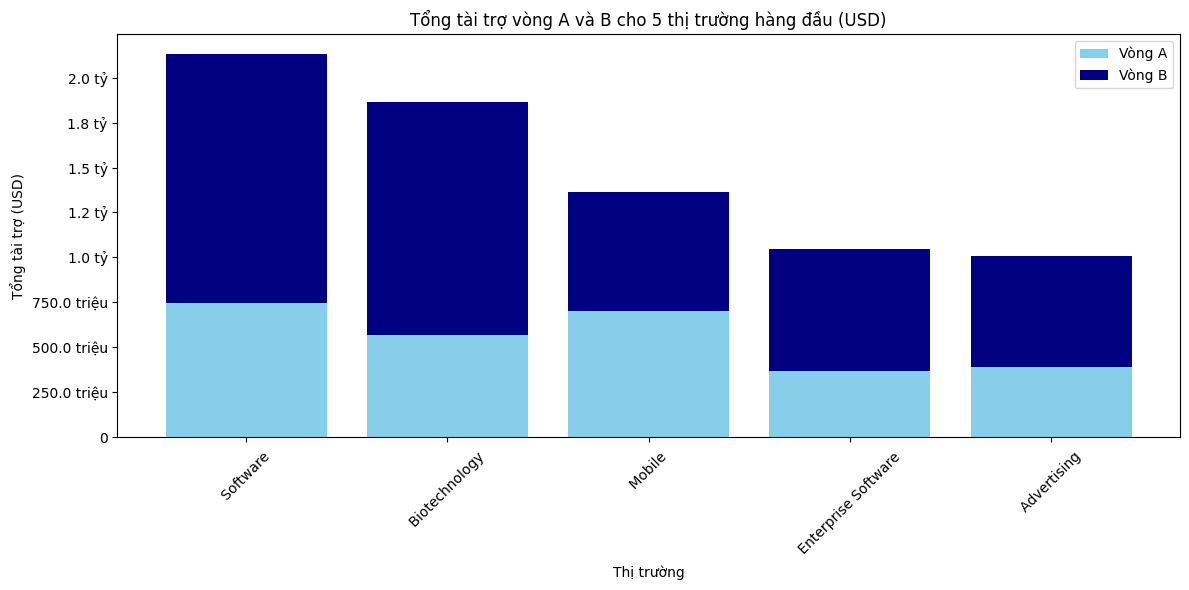

In [ ]:
# Biểu đồ cột xếp chồng: Tổng tài trợ theo vòng gọi vốn (round_A, round_B) cho 5 thị trường hàng đầu
if all(col in df_clean.columns for col in ['round_A', 'round_B']):
    # Bỏ 'Other' ra trước khi tính tổng
    df_market = df_clean[df_clean['market'] != 'Other']

    top_markets_funding = (
        df_market.groupby('market')[['round_A', 'round_B']].sum()
        .assign(total=lambda x: x['round_A'] + x['round_B'])
        .nlargest(5, 'total')
        .reset_index()
    )

    plt.figure(figsize=(12, 6))
    plt.bar(top_markets_funding['market'], top_markets_funding['round_A'], label='Vòng A', color='skyblue')
    plt.bar(top_markets_funding['market'], top_markets_funding['round_B'],
            bottom=top_markets_funding['round_A'], label='Vòng B', color='navy')
    plt.title('Tổng tài trợ vòng A và B cho 5 thị trường hàng đầu (USD)')
    plt.xlabel('Thị trường')
    plt.ylabel('Tổng tài trợ (USD)')
    plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: format_number(x)))
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("Bỏ qua biểu đồ tài trợ vòng A và B do thiếu một hoặc cả hai cột: 'round_A', 'round_B'.")




Software và Biotechnology là hai thị trường hàng đầu về tổng tài trợ, cho thấy chúng có tiềm năng lớn và thu hút sự quan tâm mạnh mẽ từ nhà đầu tư. Các startup trong lĩnh vực này có thể có cơ hội phát triển cao hơn, đặc biệt nếu vượt qua được giai đoạn đầu (vòng A).

Advertising có tổng tài trợ thấp nhất, cho thấy thị trường này có thể ít hấp dẫn hơn đối với nhà đầu tư, hoặc các startup trong lĩnh vực này gặp khó khăn trong việc chứng minh tiềm năng tăng trưởng.

# **Phan Loai**

In [ ]:
# --- TÁCH BIẾN ĐẦU VÀO VÀ MỤC TIÊU ---
drop_cols = ['name', 'permalink', 'homepage_url', 'market', 'country_code', 'status', 'status_binary', 'category_list']
X = df_clean.drop(columns=drop_cols, errors='ignore')
X = X.select_dtypes(include=[np.number])
y = df_clean['status_binary']

# Kiểm tra dữ liệu thiếu
print("Missing values:\n", X.isna().sum())
print("Class distribution:\n", y.value_counts(normalize=True))

# --- CHIA TẬP HUẤN LUYỆN / KIỂM TRA ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)



Missing values:
 funding_total_usd       0
funding_rounds          0
founded_month           0
founded_quarter         0
founded_year            0
seed                    0
venture                 0
equity_crowdfunding     0
undisclosed             0
convertible_note        0
debt_financing          0
angel                   0
grant                   0
private_equity          0
post_ipo_equity         0
post_ipo_debt           0
secondary_market        0
product_crowdfunding    0
round_A                 0
round_B                 0
round_C                 0
round_D                 0
round_E                 0
round_F                 0
round_G                 0
round_H                 0
age_first_funding       0
age_last_funding        0
total_investment        0
dtype: int64
Class distribution:
 status_binary
1    0.624573
0    0.375427
Name: proportion, dtype: float64



GridSearchCV cho mô hình: Logistic Regression
Best Params: {'logreg__C': 0.1, 'logreg__penalty': 'l2', 'logreg__solver': 'lbfgs'}
Accuracy: 0.6811
F1 Score: 0.7165
ROC-AUC: 0.7661
Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.74      0.64       286
           1       0.81      0.64      0.72       476

    accuracy                           0.68       762
   macro avg       0.68      0.69      0.68       762
weighted avg       0.71      0.68      0.69       762



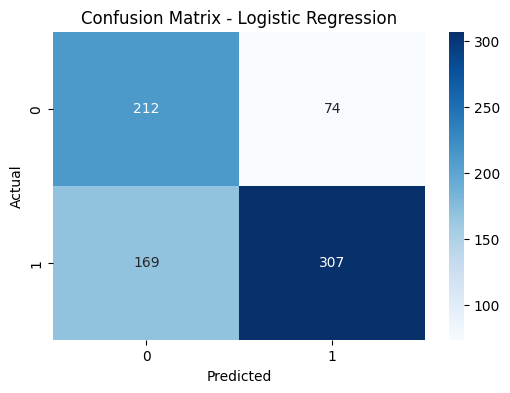


GridSearchCV cho mô hình: Random Forest
Best Params: {'max_depth': 7, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
Accuracy: 0.7703
F1 Score: 0.8183
ROC-AUC: 0.8109
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.67      0.69       286
           1       0.81      0.83      0.82       476

    accuracy                           0.77       762
   macro avg       0.76      0.75      0.75       762
weighted avg       0.77      0.77      0.77       762



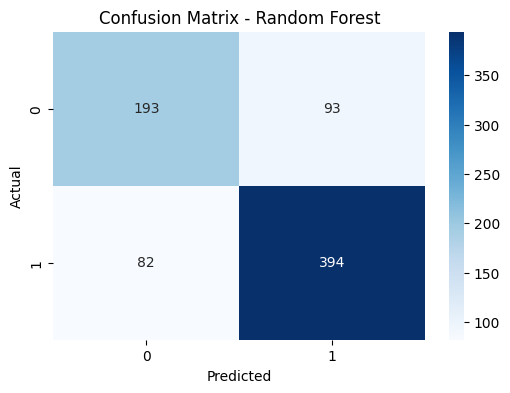


GridSearchCV cho mô hình: XGBoost


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning:

[15:46:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




Best Params: {'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 100, 'subsample': 0.8}
Accuracy: 0.7625
F1 Score: 0.8271
ROC-AUC: 0.8108
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.52      0.62       286
           1       0.76      0.91      0.83       476

    accuracy                           0.76       762
   macro avg       0.77      0.71      0.72       762
weighted avg       0.76      0.76      0.75       762



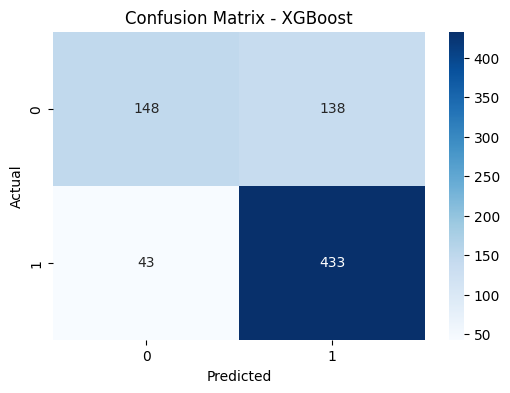

In [ ]:
# --- KHỞI TẠO CÁC MÔ HÌNH ---
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
model_configs = {
    "Logistic Regression": (
        Pipeline([
            ('scaler', StandardScaler()),
            ('logreg', LogisticRegression(class_weight='balanced', max_iter=1000))
        ]),
        {
            'logreg__C': [0.01, 0.1, 1, 10],
            'logreg__penalty': ['l2'],
            'logreg__solver': ['lbfgs']
        }
    ),
    "Random Forest": (
        RandomForestClassifier(class_weight='balanced', random_state=42),
        {
            'n_estimators': [100, 200],
            'max_depth': [3, 5, 7],
            'min_samples_split': [5, 10],
            'min_samples_leaf': [2, 4],
            'max_features': ['sqrt']
        }
    ),
    "XGBoost": (
        XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
        {
            'n_estimators': [100, 200],
            'max_depth': [3, 6],
            'learning_rate': [0.01, 0.1, 0.2],
            'subsample': [0.8, 1]
        }
    )
}


# === ĐÁNH GIÁ MÔ HÌNH VỚI GRIDSEARCHCV ===
best_models = {}

for name, (model, param_grid) in model_configs.items():
    print(f"\nGridSearchCV cho mô hình: {name}")
    grid_search = GridSearchCV(model, param_grid, scoring='f1', cv=cv, n_jobs=-1)
    grid_search.fit(X_train, y_train)

    best_model = grid_search.best_estimator_
    best_models[name] = best_model

    # Dự đoán
    y_pred = best_model.predict(X_test)
    y_prob = best_model.predict_proba(X_test)[:, 1] if hasattr(best_model, 'predict_proba') else None

    # Đánh giá
    print(f"Best Params: {grid_search.best_params_}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"F1 Score: {f1_score(y_test, y_pred):.4f}")
    if y_prob is not None:
        print(f"ROC-AUC: {roc_auc_score(y_test, y_prob):.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # Vẽ ma trận nhầm lẫn
    plt.figure(figsize=(6, 4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()




**1. Logistic Regression**

Mô hình có xu hướng dự đoán lớp 1 (Acquired) tốt hơn lớp 0 (Closed), với precision cao hơn (81% so với 56%) và số lượng dự đoán đúng cho lớp 1 (307) cao hơn lớp 0 (212).

Tuy nhiên, recall của lớp 0 (74%) cao hơn lớp 1 (64%), cho thấy mô hình phát hiện tốt hơn các trường hợp "Closed", nhưng lại bỏ sót khá nhiều trường hợp "Acquired" (169/476).

**2. Random Forest**

Mô hình Random Forest có hiệu suất tốt hơn nhiều so với Logistic Regression (trước đó: Accuracy 68.11%, F1-Score 0.69). Số lượng dự đoán đúng tăng đáng kể cho cả hai lớp: 193/286 cho lớp 0 và 394/476 cho lớp 1.

Số lỗi dự đoán giảm: False Negatives cho lớp 0 giảm từ 74 xuống 93, và False Negatives cho lớp 1 giảm từ 169 xuống 82 so với Logistic Regression.
Mô hình cân bằng hơn trong việc dự đoán cả hai lớp, với recall của lớp 1 (83%) cao hơn lớp 0 (67%), nhưng precision của cả hai lớp khá tương đồng (79% và 81%).

**3. XGBoost**

Mô hình XGBoost có xu hướng dự đoán lớp 1 (Acquired) rất tốt, với recall cao (91%) và số lượng dự đoán đúng cao (433/476).

Tuy nhiên, mô hình dự đoán lớp 0 (Closed) kém hơn, với recall chỉ 52% và số lượng dự đoán sai khá lớn (138/286 bị dự đoán thành lớp 1).

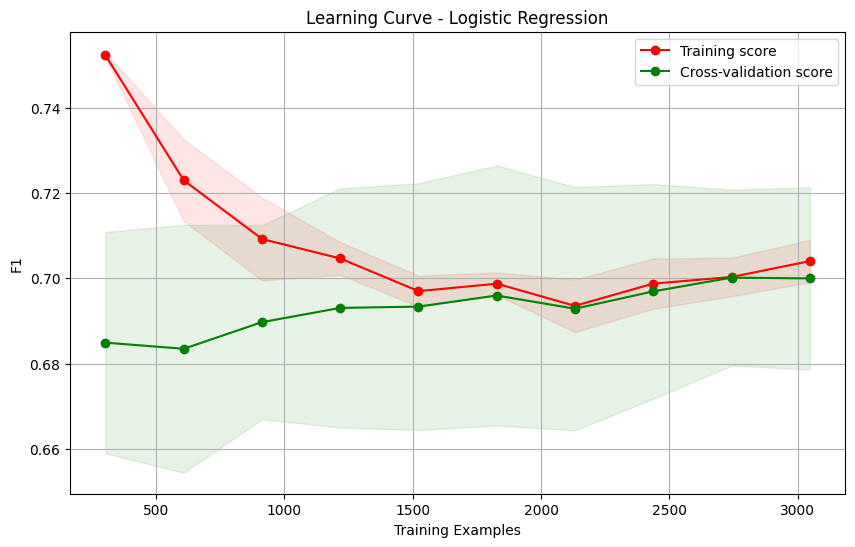

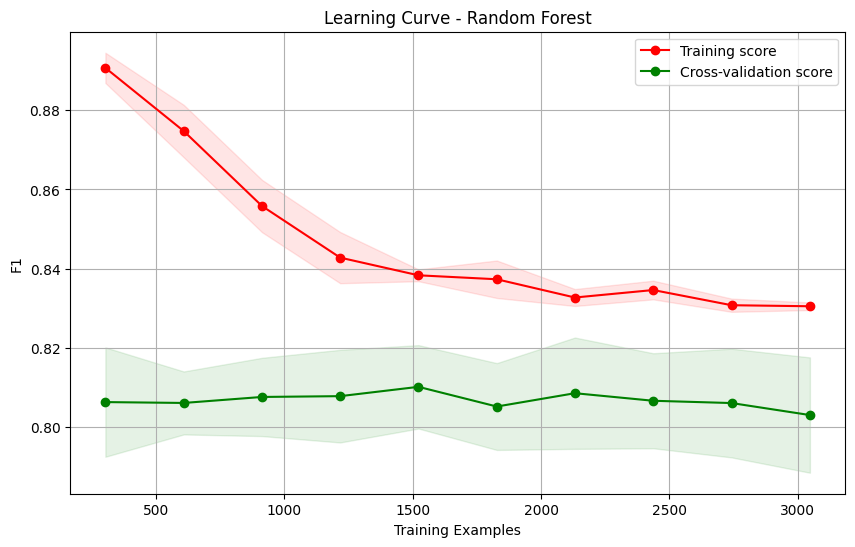

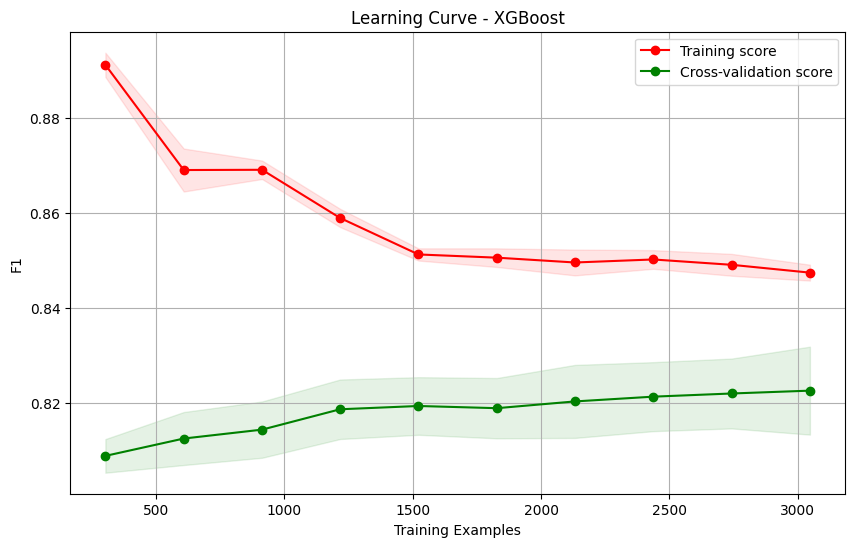

In [ ]:
def plot_learning_curve(estimator, title, X, y, scoring='f1', cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)):
    plt.figure(figsize=(10, 6))
    plt.title(title)
    plt.xlabel("Training Examples")
    plt.ylabel(scoring.upper())
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, scoring=scoring, n_jobs=n_jobs, train_sizes=train_sizes
    )
    plt.grid()
    plt.fill_between(train_sizes, np.mean(train_scores, axis=1) - np.std(train_scores, axis=1),
                     np.mean(train_scores, axis=1) + np.std(train_scores, axis=1), alpha=0.1, color="r")
    plt.fill_between(train_sizes, np.mean(test_scores, axis=1) - np.std(test_scores, axis=1),
                     np.mean(test_scores, axis=1) + np.std(test_scores, axis=1), alpha=0.1, color="g")
    plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', color="r", label="Training score")
    plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', color="g", label="Cross-validation score")
    plt.legend(loc="best")
    plt.show()

# Vẽ Learning Curve cho mô hình đã tối ưu
for name, model in best_models.items():
    plot_learning_curve(model, f"Learning Curve - {name}", X, y)



**1. Logistic Regression**

Khi số lượng mẫu nhỏ (500-1000 mẫu), khoảng cách giữa Training Score và Cross-Validation Score khá lớn (khoảng 0.76 so với 0.68), cho thấy mô hình có dấu hiệu overfitting (học quá khớp trên tập huấn luyện, nhưng hiệu suất trên tập kiểm tra chéo thấp).

Khi số lượng mẫu tăng lên (2000-3000 mẫu), khoảng cách này thu hẹp lại, và cả hai đường cong hội tụ ở mức khoảng 0.70. Điều này cho thấy mô hình đã đạt được sự cân bằng tốt hơn giữa tập huấn luyện và tập kiểm tra chéo, giảm overfitting.

**2. Random Forest**

Khi số lượng mẫu nhỏ (500-1000 mẫu), khoảng cách giữa Training Score và Cross-Validation Score khá lớn (0.92 so với 0.74), cho thấy mô hình có dấu hiệu overfitting (học quá khớp trên tập huấn luyện, hiệu suất trên tập kiểm tra chéo thấp hơn).

Khi số lượng mẫu tăng lên (2000-3000 mẫu), khoảng cách này thu hẹp lại, với Training Score giảm xuống 0.82 và Cross-Validation Score tăng lên 0.77. Điều này cho thấy mô hình đã đạt được sự cân bằng tốt hơn, giảm overfitting.

**3. XGBoost**

Khi số lượng mẫu nhỏ (500-1000 mẫu), khoảng cách giữa Training Score và Cross-Validation Score khá lớn (0.92 so với 0.72), cho thấy mô hình có dấu hiệu overfitting.

Khi số lượng mẫu tăng lên (2000-3000 mẫu), khoảng cách này thu hẹp lại, với Training Score giảm xuống 0.84 và Cross-Validation Score tăng lên 0.76. Điều này cho thấy mô hình đã đạt được sự cân bằng tốt hơn, giảm overfitting.

In [ ]:
# --- TÓM TẮT KẾT QUẢ ---
results_df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'F1 Score', 'ROC-AUC'])
results_df = results_df.drop_duplicates()
print("\nSo sánh các mô hình:")
print(results_df)


So sánh các mô hình:
                 Model  Accuracy  F1 Score   ROC-AUC
0  Logistic Regression  0.673228  0.709452  0.765352
2        Random Forest  0.748031  0.807615  0.789207
4              XGBoost  0.724409  0.787449  0.764452


# **Hoi quy**

In [ ]:
# --- TÁCH BIẾN ĐẦU VÀO VÀ MỤC TIÊU ---
# --- XỬ LÝ DỮ LIỆU ---
# Loại bỏ cột không cần thiết và xử lý giá trị thiếu
drop_cols = ['name', 'permalink', 'homepage_url', 'market', 'country_code', 'status', 'status_binary', 'category_list']
X = df_clean.drop(columns=drop_cols + ['funding_total_usd'], errors='ignore')
X = X.select_dtypes(include=[np.number]).dropna()  # Chỉ giữ cột số và loại bỏ hàng thiếu

# Áp dụng log transformation cho mục tiêu để giảm độ lệch
y = np.log1p(df_clean.loc[X.index, 'funding_total_usd'])  # Đồng bộ index với X
# Hàm vẽ learning curves
def plot_learning_curve(estimator, title, X, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 10)):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, train_sizes=train_sizes, scoring='r2', n_jobs=-1
    )

    # Tính trung bình và độ lệch chuẩn
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    # Vẽ biểu đồ
    plt.figure(figsize=(8, 6))
    plt.plot(train_sizes, train_mean, label='Training R²', color='blue')
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='blue')
    plt.plot(train_sizes, test_mean, label='Cross-validation R²', color='orange')
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color='orange')

    plt.title(title)
    plt.xlabel('Training Examples')
    plt.ylabel('R² Score')
    plt.legend(loc='best')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# --- CHUẨN HÓA BIẾN SỐ ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- CHIA TẬP HUẤN LUYỆN / KIỂM TRA ---
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)




===== Linear Regression =====
RMSE: 1.41
R² Score: 0.5661
Cross-Validation R² Mean: 0.5637 (±0.0252)


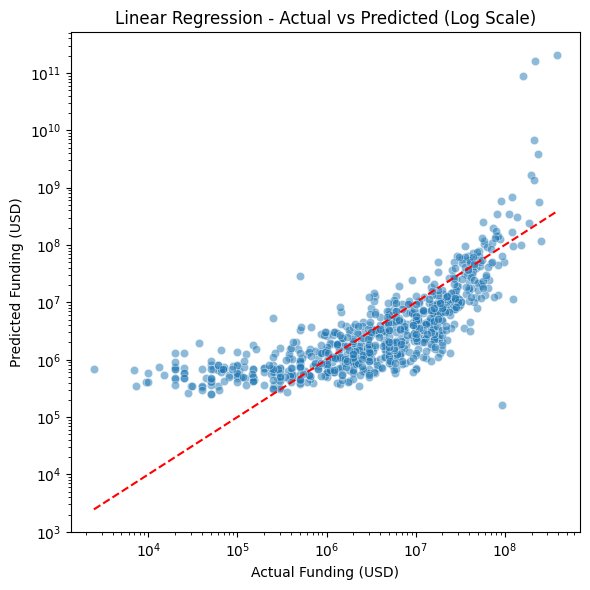

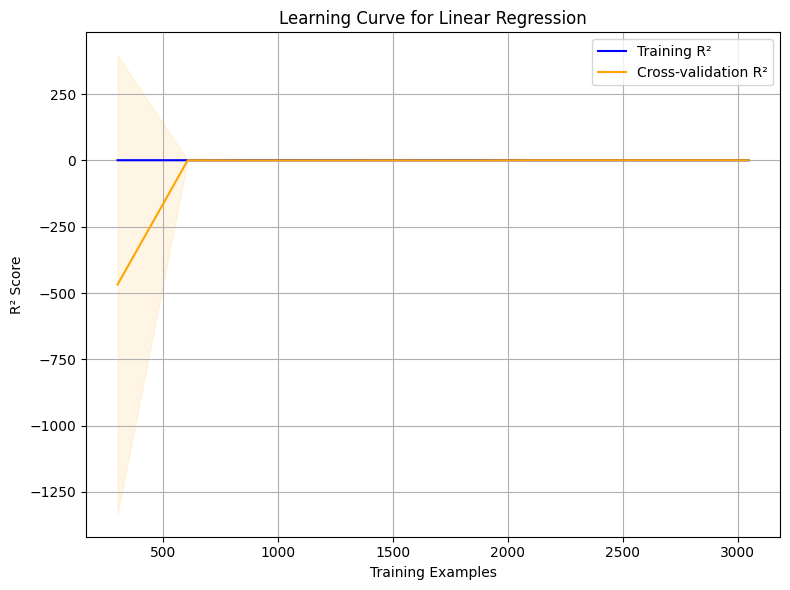


Best parameters for Ridge Regression: {'alpha': 10.0}

===== Ridge Regression =====
RMSE: 1.41
R² Score: 0.5668
Cross-Validation R² Mean: 0.5644 (±0.0252)


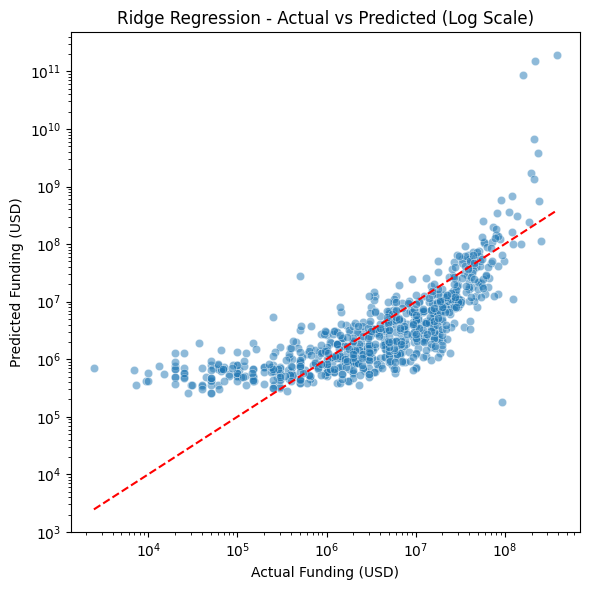

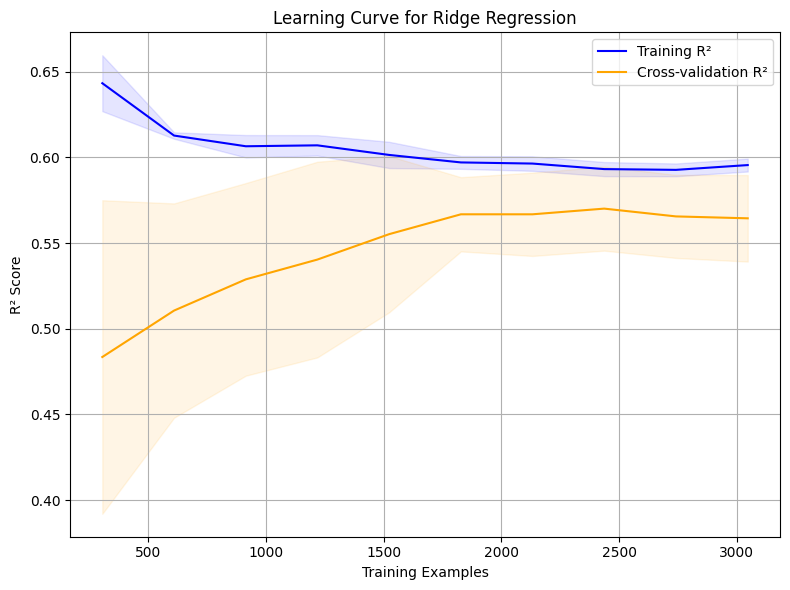


Best parameters for Random Forest Regressor: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}

===== Random Forest Regressor =====
RMSE: 0.26
R² Score: 0.9853
Cross-Validation R² Mean: 0.9804 (±0.0038)


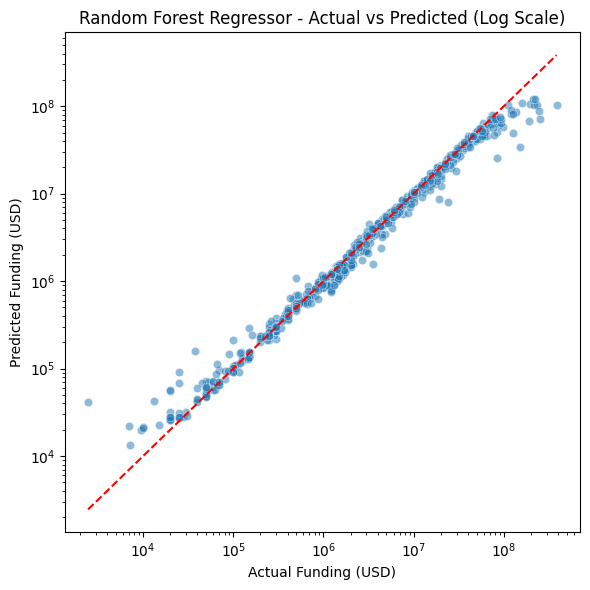

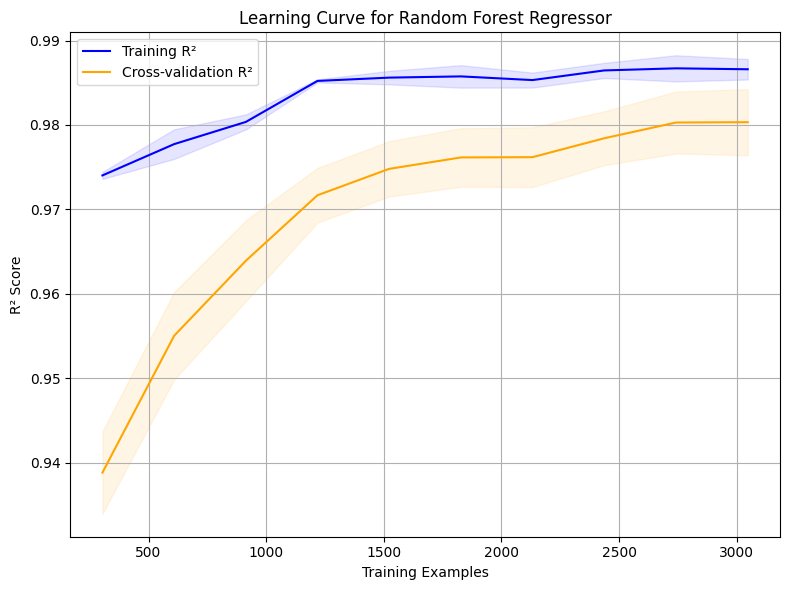


Best parameters for XGBoost Regressor: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 100, 'reg_lambda': 10}

===== XGBoost Regressor =====
RMSE: 0.03
R² Score: 0.9998
Cross-Validation R² Mean: 0.9997 (±0.0002)


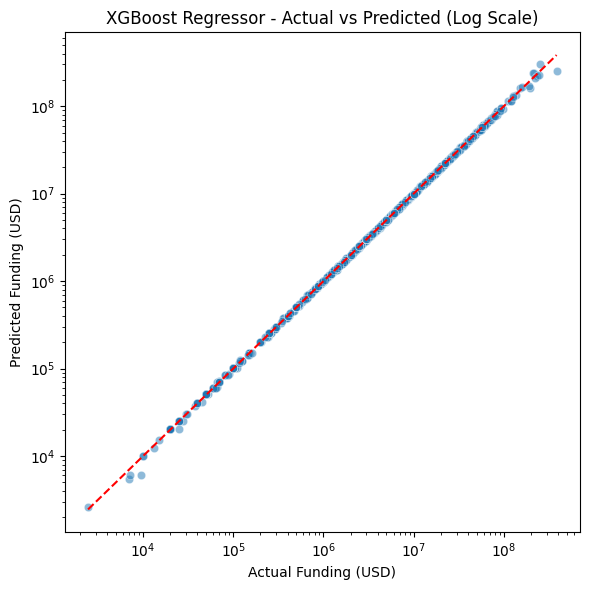

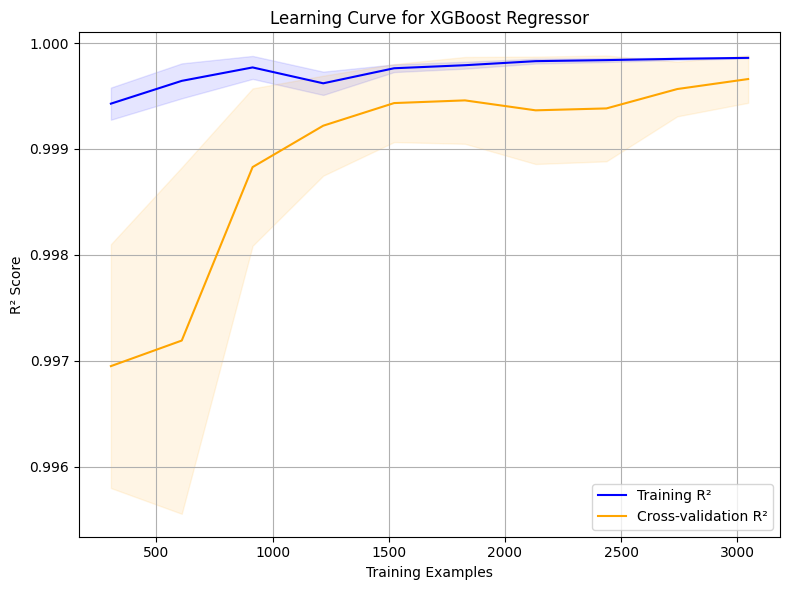


Summary of Results:
                     Model      RMSE  R² Score  CV R² Mean  CV R² Std
0        Linear Regression  1.412336  0.566098    0.563720   0.025218
1        Linear Regression  1.412336  0.566098    0.563720   0.025218
2         Ridge Regression  1.411116  0.566848    0.564406   0.025248
3         Ridge Regression  1.411116  0.566848    0.564406   0.025248
4  Random Forest Regressor  0.259838  0.985313    0.980409   0.003784
5  Random Forest Regressor  0.259838  0.985313    0.980409   0.003784
6        XGBoost Regressor  0.033814  0.999751    0.999660   0.000225
7        XGBoost Regressor  0.033814  0.999751    0.999660   0.000225


In [ ]:
# --- KHỞI TẠO CÁC MÔ HÌNH ---
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Random Forest Regressor": RandomForestRegressor(random_state=42),
    "XGBoost Regressor": XGBRegressor(objective='reg:squarederror', random_state=42)
}

param_grids = {
    "Linear Regression": {},
    "Ridge Regression": {'alpha': [1.0, 10.0]},
    "Random Forest Regressor": {
        'n_estimators': [50, 100],
        'max_depth': [5, 10],
        'min_samples_split': [5, 10],
        'min_samples_leaf': [2, 4],
        'max_features': ['sqrt']
    },
    "XGBoost Regressor": {
        'n_estimators': [50, 100],
        'max_depth': [3, 4],
        'learning_rate': [0.05, 0.1],
        'reg_lambda': [1, 10]
    }
}

results = []

for name, model in models.items():
    if param_grids[name]:
        grid_search = GridSearchCV(model, param_grids[name], cv=5, scoring='r2', n_jobs=-1)
        grid_search.fit(X_train, y_train)
        best_model = grid_search.best_estimator_
        print(f"\nBest parameters for {name}: {grid_search.best_params_}")
    else:
        best_model = model
        best_model.fit(X_train, y_train)

    y_pred = best_model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    cv_scores = cross_val_score(best_model, X_scaled, y, cv=5, scoring='r2')
    cv_mean = cv_scores.mean()
    cv_std = cv_scores.std()

    print(f"\n===== {name} =====")
    print(f"RMSE: {rmse:.2f}")
    print(f"R² Score: {r2:.4f}")
    print(f"Cross-Validation R² Mean: {cv_mean:.4f} (±{cv_std:.4f})")

    plt.figure(figsize=(6, 6))
    sns.scatterplot(x=np.expm1(y_test), y=np.expm1(y_pred), alpha=0.5)
    plt.plot([np.expm1(y_test).min(), np.expm1(y_test).max()],
             [np.expm1(y_test).min(), np.expm1(y_test).max()], 'r--')
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('Actual Funding (USD)')
    plt.ylabel('Predicted Funding (USD)')
    plt.title(f'{name} - Actual vs Predicted (Log Scale)')
    plt.tight_layout()
    plt.show()

    results.append((name, rmse, r2, cv_mean, cv_std))

    # Vẽ learning curve
    plot_learning_curve(best_model, f"Learning Curve for {name}", X_scaled, y, cv=5)

    results.append((name, rmse, r2, cv_mean, cv_std))



**Linear Regression vs Ridge Regression:**

Ridge Regression cải thiện rất nhẹ so với Linear Regression, nhưng không đáng kể. Cả hai mô hình đều có hiệu suất thấp, không đạt mục tiêu R² > 0.75, và không phù hợp cho bài toán này.

**Random Forest Regressor vs Linear/Ridge Regression:**

Random Forest vượt trội hơn hẳn Linear Regression và Ridge Regression, với RMSE giảm từ 1.41 xuống 0.259838 và R² tăng từ 0.566 lên 0.985313. Điều này cho thấy Random Forest có khả năng nắm bắt các mối quan hệ phi tuyến và tương tác giữa các biến, trong khi các mô hình tuyến tính không thể.

**XGBoost Regressor vs Random Forest Regressor:**

XGBoost vượt trội hơn Random Forest, với RMSE giảm từ 0.259838 xuống 0.033814 và R² tăng từ 0.985313 lên 0.999751. Điều này cho thấy XGBoost có khả năng tối ưu hóa tốt hơn, học được các mẫu phức tạp hơn trong dữ liệu.
Hiệu suất kiểm tra chéo của XGBoost (CV R² Mean 0.999660) cũng cao hơn Random Forest (0.980409), và độ lệch chuẩn nhỏ hơn (0.000225 so với 0.003784), cho thấy XGBoost ổn định hơn.

In [ ]:
# Hiển thị kết quả
results_df = pd.DataFrame(results, columns=['Model', 'RMSE', 'R² Score', 'CV R² Mean', 'CV R² Std'])
results_df = results_df.drop_duplicates()
print("\nSummary of Results:")
print(results_df)


Summary of Results:
                     Model      RMSE  R² Score  CV R² Mean  CV R² Std
0        Linear Regression  1.412336  0.566098    0.563720   0.025218
2         Ridge Regression  1.411116  0.566848    0.564406   0.025248
4  Random Forest Regressor  0.259838  0.985313    0.980409   0.003784
6        XGBoost Regressor  0.033814  0.999751    0.999660   0.000225
